# EDA with Tabular Datasets

#Bring Matplotlib Visualization to Exploratory Analysis

In [ ]:
# The script below is to download the required dataset from github

!git clone https://github.com/acmbpdc/ML-Bootcamp-2024.git

fatal: destination path 'ML-Bootcamp-2024' already exists and is not an empty directory.


Copying the files into /content for easy access

In [ ]:
!cp "/content/ML-Bootcamp-2024/Session 1/medical_ds/Job_Placement_Data.csv" /content

!cp "/content/ML-Bootcamp-2024/Session 1/medical_ds/diabetes.csv" /content

## Definition of the Business Problem

Let's create a predictive model that can predict whether or not a person can develop Diabetes. To do this, we will use patient history data available in the dataset below. If the definition is not well done, it will compromise our work.

From this definition, we started our work of dataset collection, the transformation of variables and the division of Training and Test data.

Dataset: Pima Indians Diabetes Data Set
http://archive.ics.uci.edu/ml/datasets/diabetes

This dataset describes the medical records among Pima Inidians patients and each record is marked whether or not the patient developed diabetes. It contains multivariate data and can be used for time series.

### Information about attributes:
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)  

We need the predictor variables and the target variable.

## Extracting and Loading Data

There are several considerations when uploading data to the Machine Learning process. For example, does your data have a header? If not, you will need to set the title for each column. Do your files have comments? What is the delimiter of the columns? Are some data in quotation marks, single or double?

In [ ]:
# Loading csv file using Pandas
# Pandas Library Provides Data Structure for Data Storage
import pandas as pd
file = '/content/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# I already know that the file has no header and Fill on import
data = pd.read_csv(file, names=columns, skiprows=1)
print(data.shape)

(768, 9)


## Exploratory Data Analysis
### Data Preprocessing

### Descriptive Statistics

In [ ]:
# Viewing the first 20 lines
data.head(20)

preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118    84    47   230  45.8  0.551   31      1
17     7   107    74     0     0  29.6  0.254   31      1
18     1   103    30    38    83  43.3  0.183   33      0
19     1   115    70    30    96  34.6  0.529   32      1

If the number of lines in the file is vast, the algorithm can take a long time to be trained, and If the number of records is too small, we may not have enough records to train the model. It is reasonable to have up to one million records for the machine to process without difficulty. Above that, the record numbers will demand computationally from the engine.

If we have many columns in the file, the algorithm can present performance problems due to the high dimensionality. In this case, we can apply the dimensionality reduction if necessary. The best solution will depend on each situation. Remember: train the model in a subset of the more extensive Dataset and then apply it to new data. That is, it is not necessary to use the entire Dataset. It is enough to use a representative subset to train the algorithm.

In [ ]:
# Viewing dimensions
data.shape

(768, 9)

The type of data is essential. It may be necessary to convert strings, or columns with integers may represent categorical variables or ordinary values.

In [ ]:
# Statistical summary
data.describe()

preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

In classification problems, it may be necessary to balance the classes. Unbalanced classes (more significant volumes of one of the class types) are common and need to be addressed during the pre-processing phase.

We can see below that there is an evident disproportion between classes 0 (non-occurrence of diabetes) and 1 (occurrence of diabetes). We apply the class variable to the Pandas groupby function and measure its size:

In [ ]:
# Distribution of classes
data.groupby('class').size()

class
0    500
1    268
dtype: int64

We have 500 records with class 0 and 268 class 1 records, meaning we have more records of people who have not developed Diabetes than people who have developed. When the algorithm goes through these numbers, it will end up learning more about a person who does not have Diabetes than a person who has Diabetes - we need to have the same proportion for the two classes of the set.

One way to understand the relationship between data is through correlation. The Correlation is the relationship between 2 variables. The most common method for calculating correlation is the Pearson method, which assumes a normal distribution of data.
A correlation of -1 shows a negative correlation, while
A correlation of +1 shows a positive correlation.
A correlation of 0 indicates that there is no relationship between the variables.

Some algorithms such as a linear regression and logistic regression can present performance problems with highly correlated (collinear) attributes.
How do I know if the algorithm requires modification? Consult the algorithm's documentation to find out what the algorithm specifically needs

In [ ]:
# Apply Pearson's correlation between all variables in the dataset
data.corr(method = 'pearson', numeric_only=True)

preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.263514  0.466581  
pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.033561  0.173844  
age    1.000000  0.238356  
class  0.238356  1.000000

In [ ]:
data = data.drop(0)

for col in data:
  data[col] = data[col].astype(float)

data.corr(method = 'pearson', numeric_only=True)

preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.128846  0.141197 -0.082495 -0.072999  0.017518 -0.033927   
plas   0.128846  1.000000  0.152498  0.056381  0.332383  0.220955  0.136903   
pres   0.141197  0.152498  1.000000  0.207308  0.089098  0.281777  0.041180   
skin  -0.082495  0.056381  0.207308  1.000000  0.437974  0.392553  0.183498   
test  -0.072999  0.332383  0.089098  0.437974  1.000000  0.198111  0.185579   
mass   0.017518  0.220955  0.281777  0.392553  0.198111  1.000000  0.140546   
pedi  -0.033927  0.136903  0.041180  0.183498  0.185579  0.140546  1.000000   
age    0.544018  0.262408  0.239571 -0.115873 -0.040942  0.035911  0.032738   
class  0.221087  0.465856  0.064882  0.073265  0.131984  0.292695  0.173245   

            age     class  
preg   0.544018  0.221087  
plas   0.262408  0.465856  
pres   0.239571  0.064882  
skin  -0.115873  0.073265  
test  -0.040942  0.131984  
mass   0.035911  0.292695  
pedi   0.032738  0.173245  
age    1.000000  0.236417  
class  0.236417  1.000000

What is relevant in the correlation's return is to observe the value of the predictor variables concerning the target. Example: Age x Target - positive correlation, as you get older, the more likely you are to develop Diabetes.

Skew (or symmetry) refers to the distribution of data assumed to be normal or Gaussian (bell curve). Many Machine Learning algorithms assume that the data has a normal distribution. Knowing the symmetry of the data allows you to make a preparation and deliver what the algorithm expects to receive, thus increasing the predictive model's accuracy.

Don't expect the data to come ready to use. At some point, we need to modify the variables so that they have a format of a normal distribution - this does not mean changing the variable but changing the scale so that it can be in the normal distribution format.

In [ ]:
# Checking each attribute's skew
data.skew()

preg     0.903976
plas     0.176412
pres    -1.841911
skin     0.112058
test     2.270630
mass    -0.427950
pedi     1.921190
age      1.135165
class    0.638949
dtype: float64

# ML Essentials

In [ ]:
# It may be more interesting to generate the charts in a separate window as it is a set of smaller graphs.
import matplotlib.pyplot as plt

# To be able to generate graphics within this window
%matplotlib inline

If we want to view the histogram more broadly in another window, we need to reset the Jupyter Notebook and remove the %matplotlib inline.

With the histogram, we can quickly assess the distribution of each attribute. Histograms group data into bins and provide a count of the number of observations in each container.

We can quickly check the data's symmetry with the histogram and whether it is in a normal distribution. It will help to identify outliers.

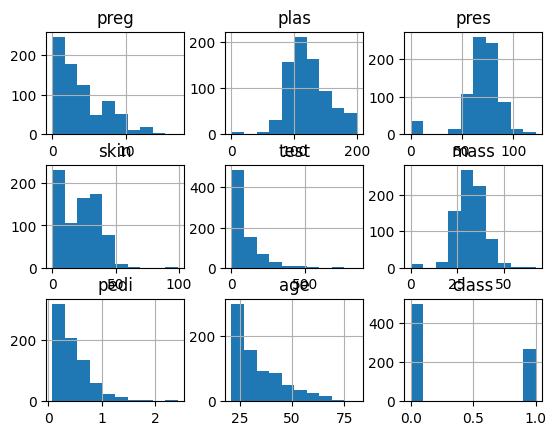

In [ ]:
# Univariate Histogram
data.hist()
plt.show()

# Graphics appear small due to% matplotlib inline
 # To view more broadly:
  # Kernel > Restart e Clear Output
   # Remove the inline line, and the graph will appear in another window

Density Plots are another way to visualize the distribution of data for each attribute. The plot is like a kind of abstract histogram with a smooth curve through the top of a histogram's bins.

It may be easier to identify the distribution of the data using a density plot. The class seems to have two peaks because there are two classes — 0|1.

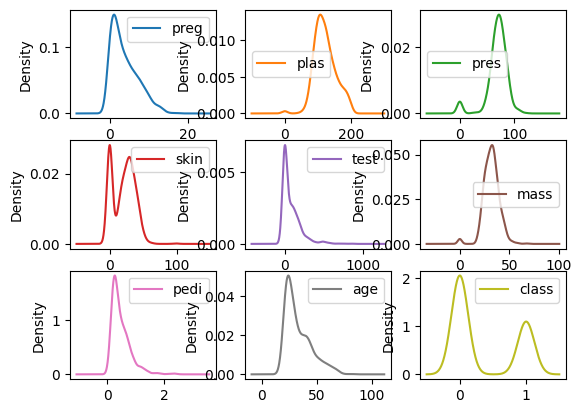

In [ ]:
# Density Plot Univariate 'Density'
data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

With boxplots, we can also review the data distribution for each attribute. Boxplot helps to get an idea of the dispersion of the data and identifies outliers quickly: values that deviate a lot from the data's average. If you leave the outlier in the Dataset, it can affect the predictive model.

We can see that the dispersion of the data is quite different among the attributes. The age, skin, and test columns have symmetry very close to smaller data values.

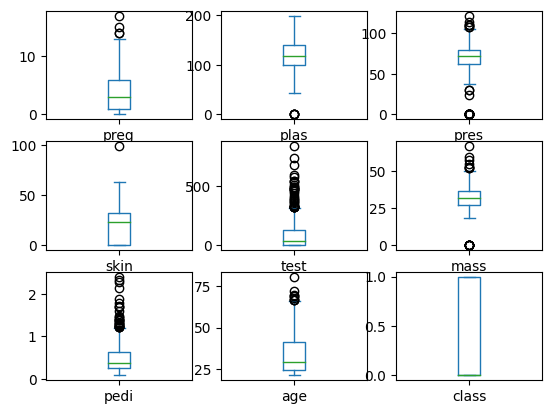

In [ ]:
# Box and Whisker Plots
data.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

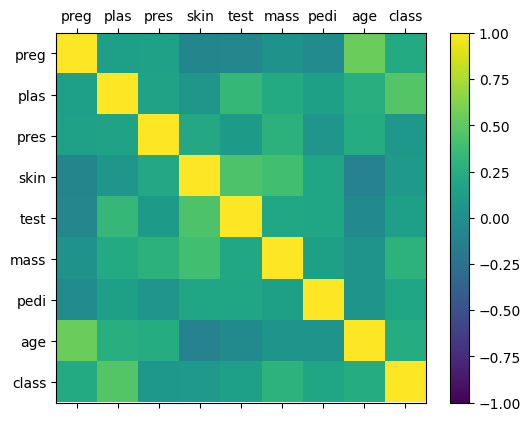

In [ ]:
# Correlation matrix with variable names
correlations = data.corr()

# The correlations variable receives all data correlations

import numpy as np             # Call Numpy
fig = plt.figure ()            # Plot figure
ax = fig.add_subplot (111)     # Add subplot
cax = ax.matshow (correlations, vmin = -1, vmax = 1) # Show correlations in the range of -1 to +1
fig.colorbar (cax)             # Coloring boxplot
ticks = np.arange (0, 9, 1)    # The array defines the size of the 9x9 square to be plotted
ax.set_xticks (ticks)          # Take the size of "ticks" and place it on the x axis
ax.set_yticks (ticks)          # Take the size of "ticks" and place it on the axis
ax.set_xticklabels (columns)   # Apply the columns listed at the beginning as labels
ax.set_yticklabels (columns)   # Applies the columns listed at the beginning as labels
plt.show () # Plot

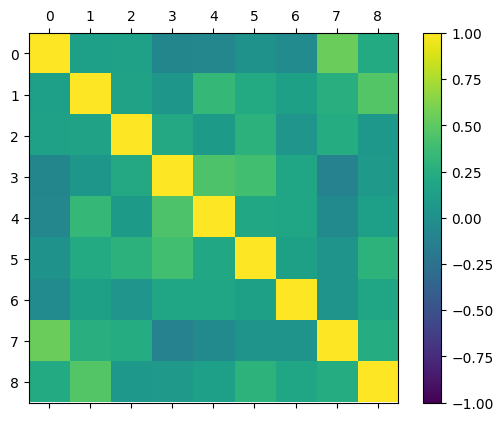

In [ ]:
# Simplified generic correlation matrix
correlations = data.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

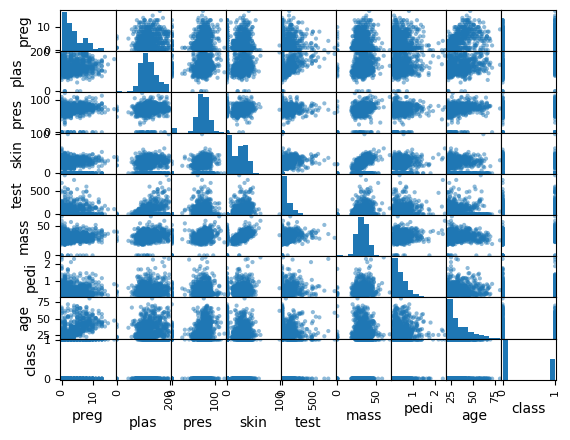

In [ ]:
# Scatter Plot
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

## Viewing with Seaborn
### Widely used for Exploratory Analysis

In [ ]:
import seaborn as sns

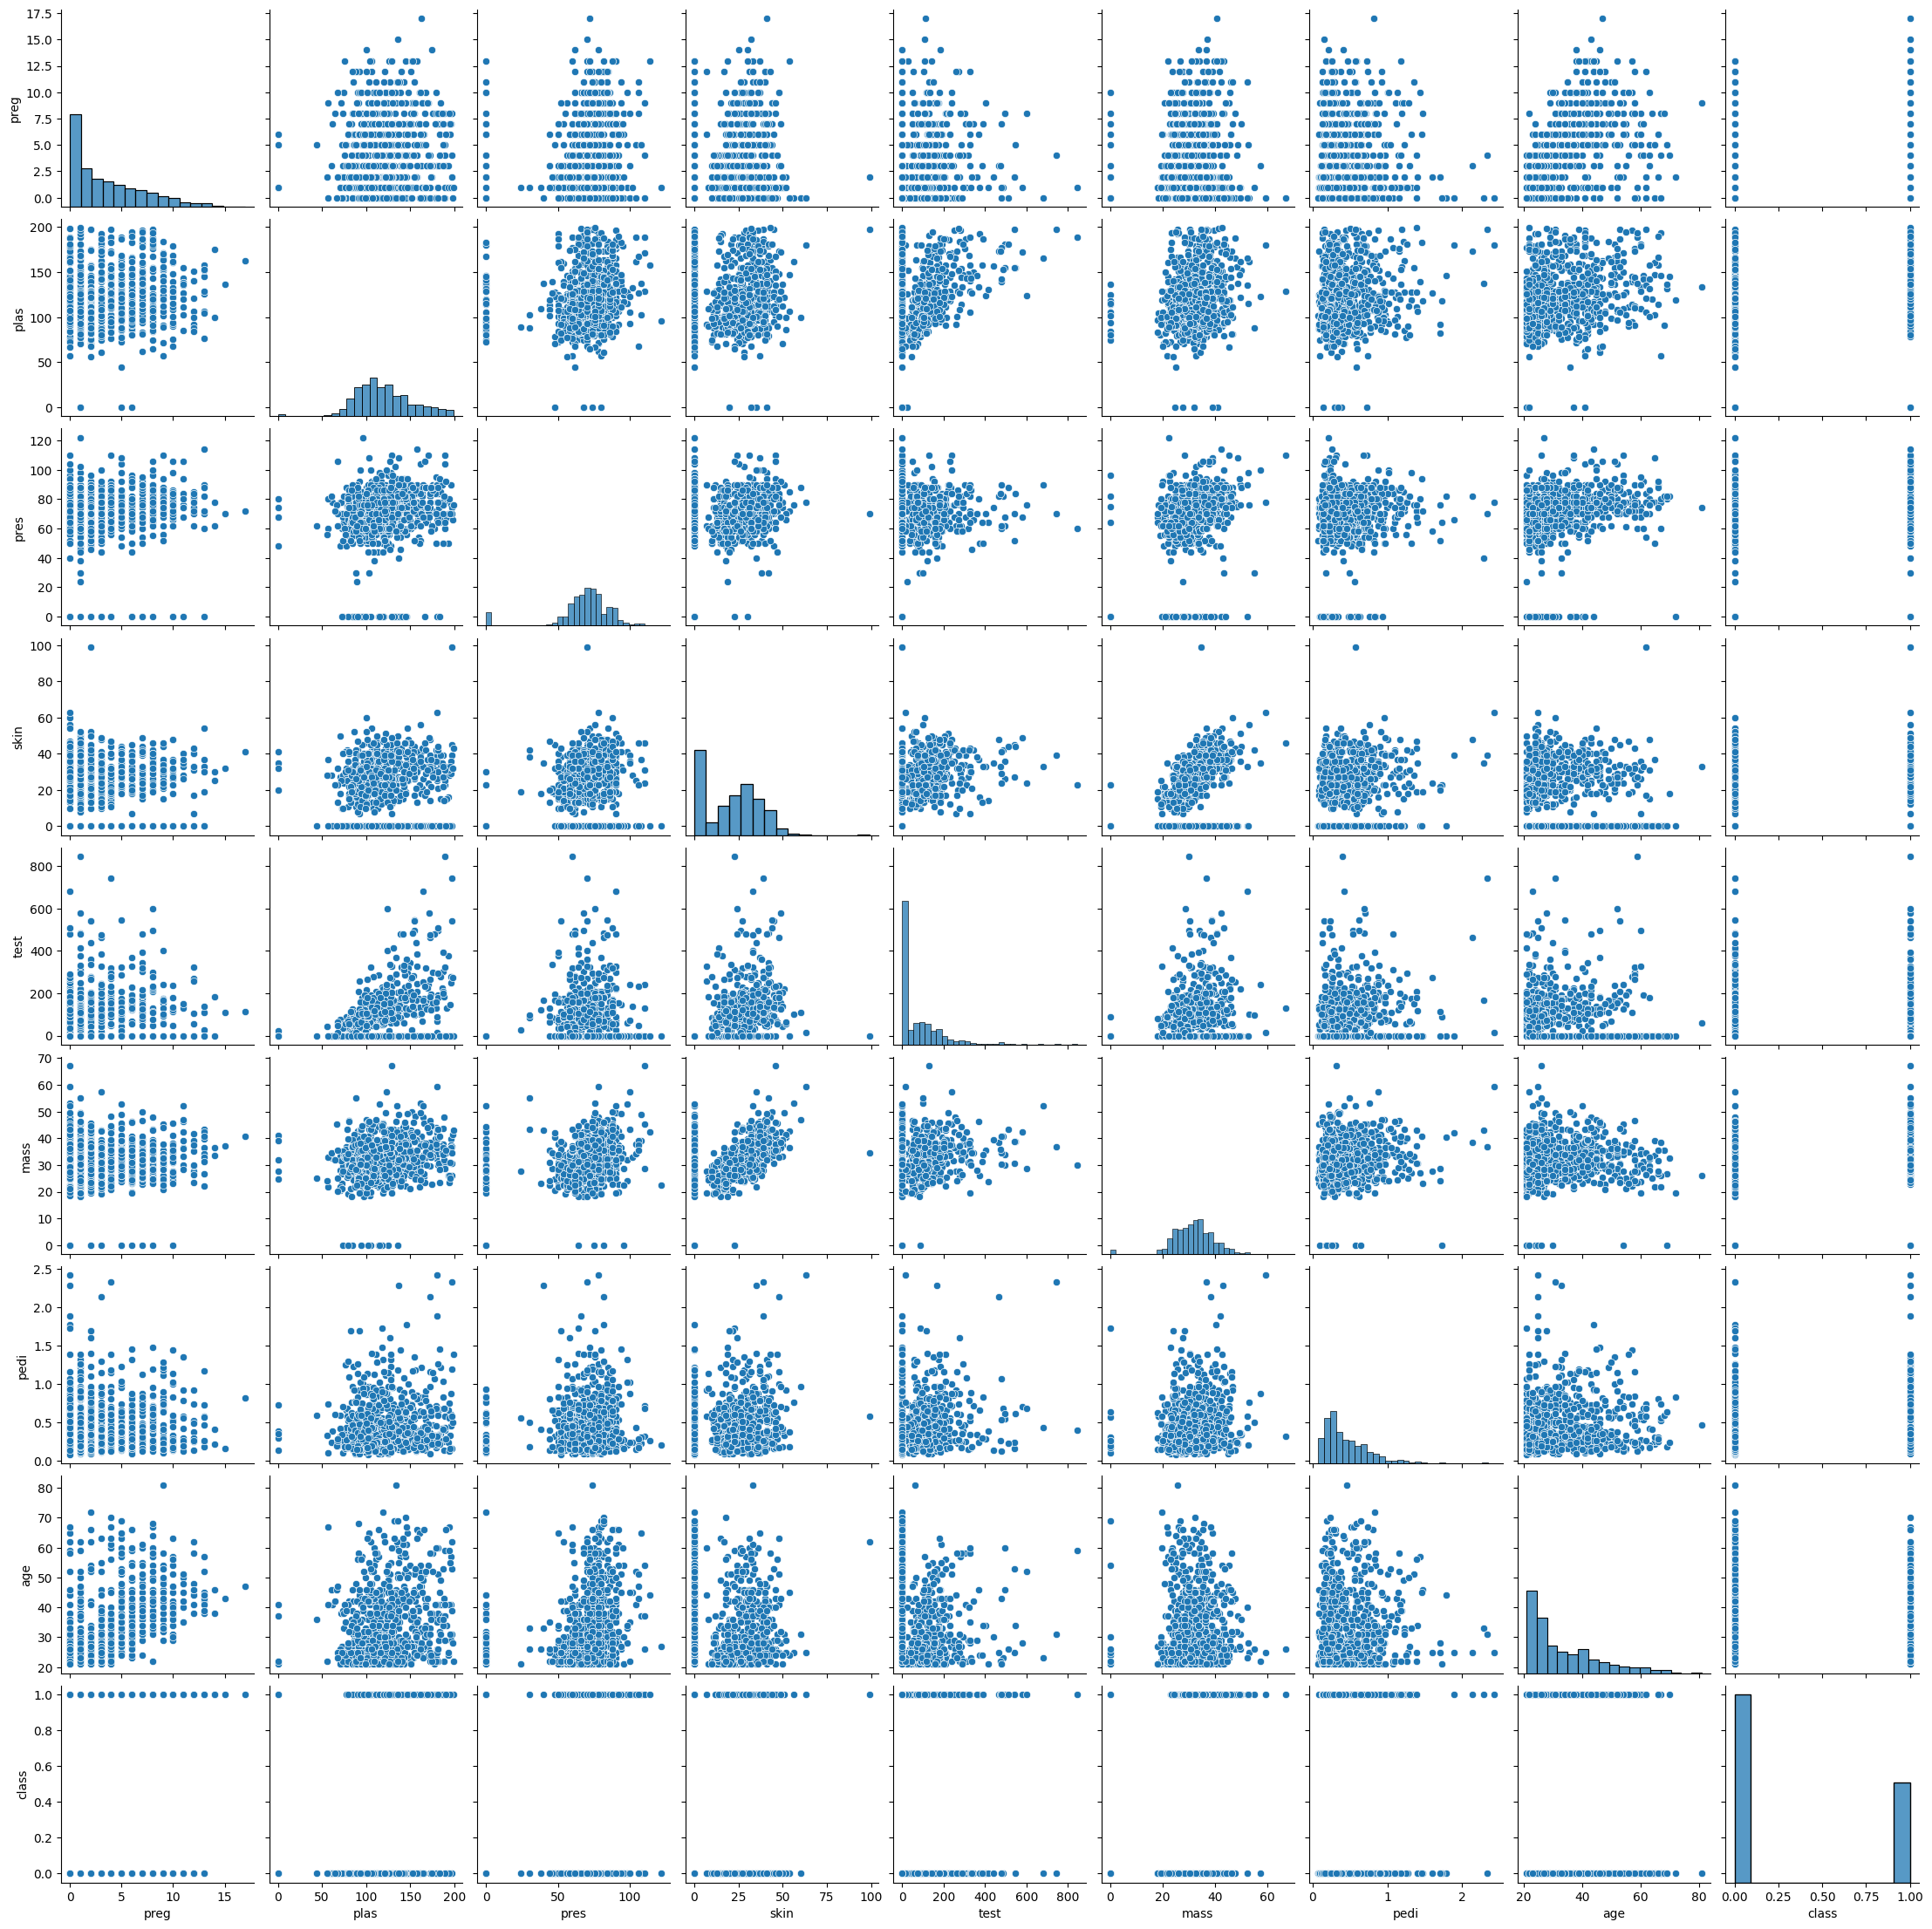

In [ ]:
# Pairplot
sns.pairplot(data)

<Axes: >

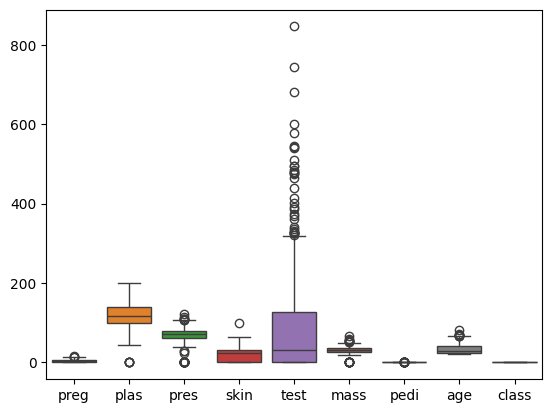

In [ ]:
# Boxplot with vertical orientation, variables side by side
# Much simpler parameters
sns.boxplot(data = data, orient = "v")

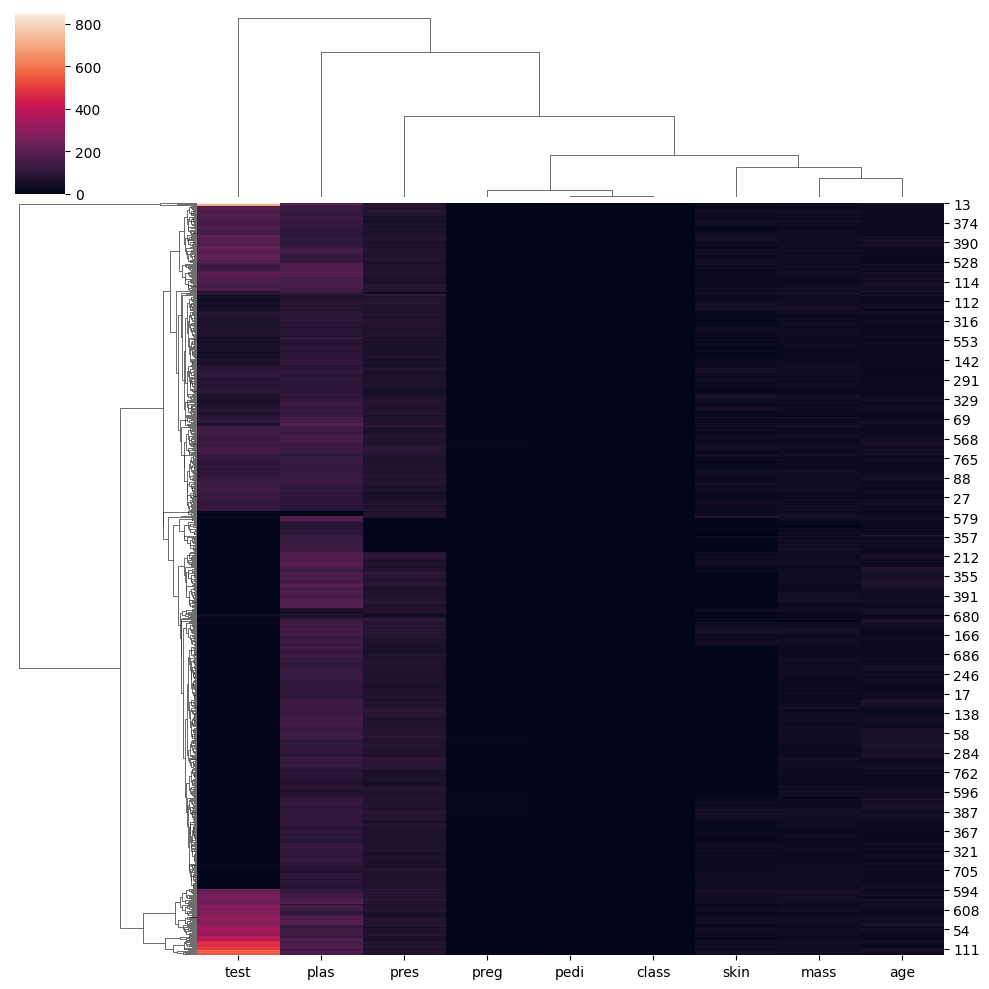

In [ ]:
# Clustermap to see how the dataset is organized
sns.clustermap(data)

In [ ]:
data.describe()

preg        plas        pres        skin        test        mass  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877   31.978468   19.368155   15.954059  115.283105    7.889091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   32.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  127.500000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  767.000000  767.000000  767.000000  
mean     0.471674   33.219035    0.348110  
std      0.331497   11.752296    0.476682  
min      0.078000   21.000000    0.000000  
25%      0.243500   24.000000    0.000000  
50%      0.371000   29.000000    0.000000  
75%      0.625000   41.000000    1.000000  
max      2.420000   81.000000    1.000000

<ipython-input-115-e4017740686f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.pedi, fit = stats.norm);


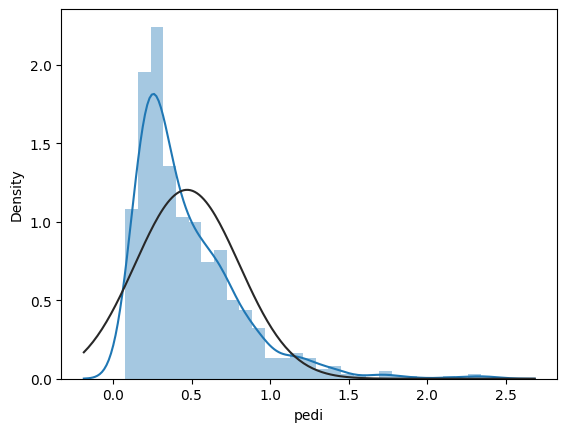

In [ ]:
from scipy import stats
sns.distplot(data.pedi, fit = stats.norm);

## Preparing the Data for Machine Learning

After performing the Exploratory Analysis to understand the data, we are ready to start the pre-processing step. This step embraces the transformation of the variables, selects the best ones for model creation, reduces the dimensionality for massive data sets, sampling, and other techniques depending on the data, business problem, or algorithm.

Many algorithms expect to receive data in a specific format. It is our job to prepare the data in a structure that is suitable for the algorithm we are using. The challenge is that each algorithm requires a different system, which may require other transformations in the data. But it is possible in some cases to obtain good results without pre-processing work.

Therefore, the important thing is not to decorate the process but rather to understand when it has to be done. As we work on different projects, the data may already arrive pre-processed.

## Normalization

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Normalization, binarization, and standardization are techniques exclusively applied to quantitative variables.

Normalization changes the scale of the data, and we have two techniques in scikit-learn; while standardization does not alter the distribution of data, it only places the distribution in a Gaussian format. That is, if the data is already in a normal distribution, we can only standardize it. And we still have binarization, which puts the data with the value 0 or 1 according to a rule that we specify.

It is one of the first tasks within the pre-processing. It is to put data on the same scale. Many Machine Learning algorithms will benefit from this and produce better results. This step is also called Normalization and means putting the data on a scale with a range between 0 and 1.
Normalization is valuable for optimization, being used in the core of the Machine Learning algorithms, such as gradient descent.

It helps algorithms such as regression and neural networks and algorithms that use distance measurements, such as KNN. Scikit-learn has a function for this step, called MinMaxScaler ().

In [ ]:
# Transforming data to the same scale (between 0 and 1)

# Import of modules
from pandas import read_csv

# Importing MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler

# Loading data
file = '/content/diabetes.csv'
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv (file, names=columns, skiprows=1)
array = data.values # Take the data and place it in an objectc called array

# Separating the array into input (X) and output (Y) components

# The dataset has 9 columns, the first 8 of which are predictors.
X = array [:, 0: 8]

# The last column is the target class
Y = array [:, 8]

# Generating the new scale (normalizing the data)
scaler = MinMaxScaler (feature_range = (0, 1))

# Fit for predictor variables
rescaledX = scaler.fit_transform (X)

# Summarizing the transformed data
print ("Original Data: \ n \ n", data.values)
print ("\ nStandardized Data: \ n \ n", rescaledX [0: 5 ,:])

Original Data: \ n \ n [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
\ nStandardized Data: \ n \ n [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


Here we transform the data to the same scale. We import the MinMaxScaler function for Normalization and read_csv function for reading the dataset.Next, we define the column names, pass the data values to an array, apply slicing in subsets, whereas the first eight columns are X predictors and the last column is the target variable y.

With the parameter feature_range of the MinMaxScaler function, we specify the scale between 0 and 1. After creating the scaler object, we use the fit process to apply the scaler to the X predictor data set - we do not need to normalize the output y variable in this case. That is, we use Normalization only to quantitative predictor variables.

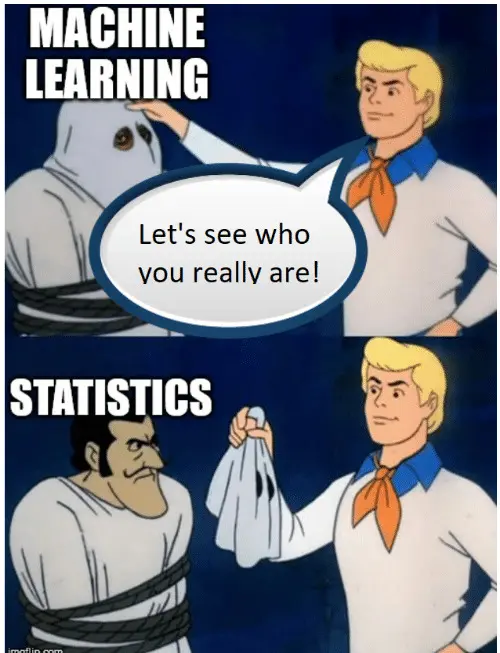

# Linear Regression

Does this look familiar?

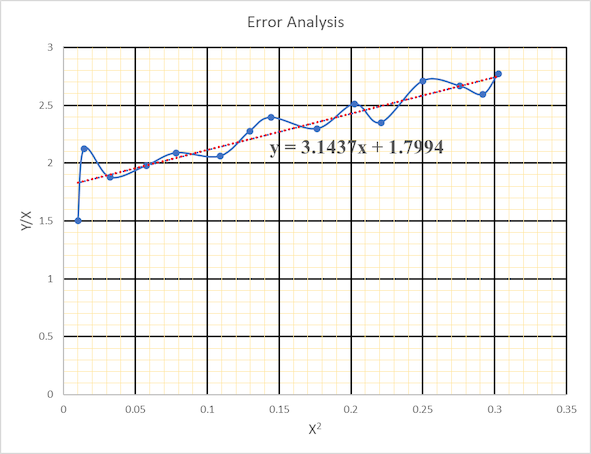

We will be doing a similar thing in python, but in a more advanced level.

**A short explanation:**

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal of linear regression is to find the linear equation that best describes the relationship between the variables.

In a simple linear regression, there is one independent variable and one dependent variable.

The linear equation takes the form of:

$y = a + bx$

where y is the dependent variable, x is the independent variable, a is the intercept, and b is the slope. The intercept represents the value of y when x is equal to zero, and the slope represents the change in y for a one-unit increase in x.

All the math involved in building the model is abstracted away into functions, so that machine learning engineers need not implement the algorithm from scratch!

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data set

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
tips_data = sns.load_dataset('tips')

In [ ]:
sns.load_dataset('diamonds')

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

In [ ]:
sns.load_dataset('attention')

Unnamed: 0  subject attention  solutions  score
0            0        1   divided          1    2.0
1            1        2   divided          1    3.0
2            2        3   divided          1    3.0
3            3        4   divided          1    5.0
4            4        5   divided          1    4.0
5            5        6   divided          1    5.0
6            6        7   divided          1    5.0
7            7        8   divided          1    5.0
8            8        9   divided          1    2.0
9            9       10   divided          1    6.0
10          10       11   focused          1    6.0
11          11       12   focused          1    8.0
12          12       13   focused          1    6.0
13          13       14   focused          1    8.0
14          14       15   focused          1    8.0
15          15       16   focused          1    6.0
16          16       17   focused          1    7.0
17          17       18   focused          1    7.0
18          18       19   focused          1    5.0
19          19       20   focused          1    6.0
20          20        1   divided          2    4.0
21          21        2   divided          2    4.0
22          22        3   divided          2    5.0
23          23        4   divided          2    7.0
24          24        5   divided          2    5.0
25          25        6   divided          2    5.0
26          26        7   divided          2    4.5
27          27        8   divided          2    7.0
28          28        9   divided          2    3.0
29          29       10   divided          2    5.0
30          30       11   focused          2    5.0
31          31       12   focused          2    9.0
32          32       13   focused          2    5.0
33          33       14   focused          2    8.0
34          34       15   focused          2    8.0
35          35       16   focused          2    8.0
36          36       17   focused          2    7.0
37          37       18   focused          2    8.0
38          38       19   focused          2    6.0
39          39       20   focused          2    6.0
40          40        1   divided          3    7.0
41          41        2   divided          3    5.0
42          42        3   divided          3    6.0
43          43        4   divided          3    5.0
44          44        5   divided          3    8.0
45          45        6   divided          3    6.0
46          46        7   divided          3    6.0
47          47        8   divided          3    8.0
48          48        9   divided          3    7.0
49          49       10   divided          3    6.0
50          50       11   focused          3    6.0
51          51       12   focused          3    8.0
52          52       13   focused          3    9.0
53          53       14   focused          3    7.0
54          54       15   focused          3    7.0
55          55       16   focused          3    7.0
56          56       17   focused          3    6.0
57          57       18   focused          3    6.0
58          58       19   focused          3    6.0
59          59       20   focused          3    5.0

## Visualizing the Data

In [ ]:
tips_data

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

The Tips dataset is a data frame with 244 rows and 7 variables which represents some tipping data where one waiter recorded information about each tip he received over a period of a few months working in one restaurant.
The waiter collected several variables:
Tip in dollars, the bill in dollars
Sex of the bill payer
Whether there were smokers in the party
Day of the week
Time of day
Size of the party.

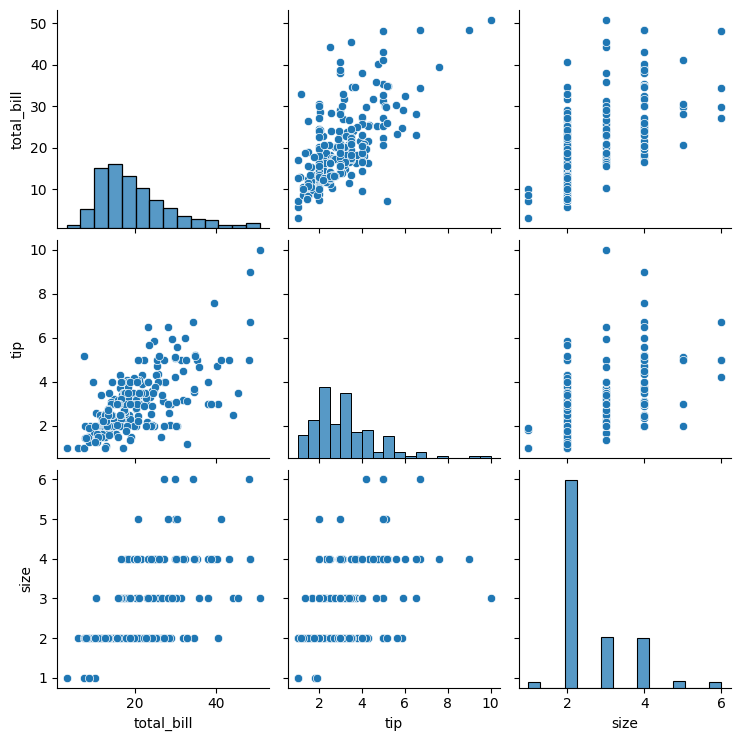

In [ ]:
sns.pairplot(tips_data)

From the pairplot we can see that there is almost a linear correspondence between total_bill and tip.

Let's try to make a linear regression model between `total_bill` and `tip`, where the model predicts the tip given to a waiter based on the total bill the customer pays.

<Axes: xlabel='total_bill', ylabel='tip'>

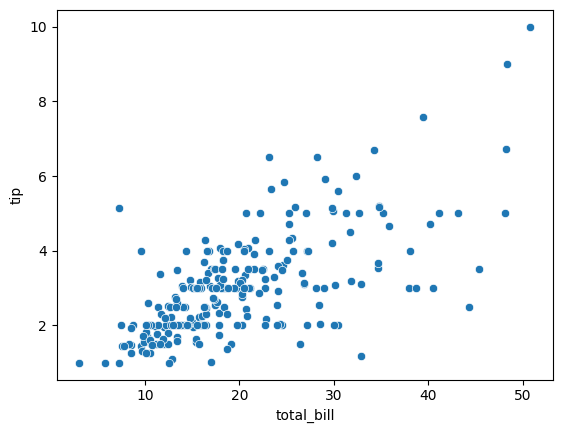

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=tips_data)

This will create a scatterplot of the `total_bill` vs `tip` variables.

Checking for a linear model:

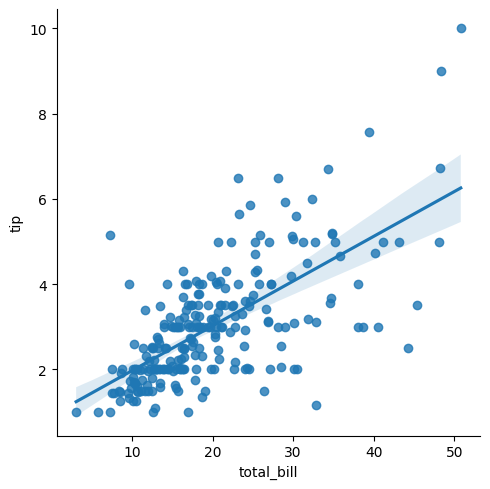

In [ ]:
sns.lmplot(x='total_bill', y='tip', data=tips_data)

This will add a regression line to the scatterplot, showing the relationship between 'total_bill' and 'tip'.

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

First we will set a variable `x` equal to the numerical features of the tips data and a variable `y` equal to the `tips` column.

In [ ]:
y = tips_data['tip']

In [ ]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [ ]:
x = tips_data['total_bill']

Use model_selection.train_test_split from sklearn to split the data into training and testing sets.

In [ ]:
TEST_SIZE = 0.1
RANDOM_STATE = 2

In [ ]:
from sklearn.model_selection import train_test_split

## Training the Model

Now its time to train our model on our training data!

In [ ]:
from sklearn.linear_model import LinearRegression

Creating an instance of a linear regression model:

In [ ]:
lm = LinearRegression(fit_intercept=False)

`fit_intercept` sets the intercept value to zero.

Basically, if total_bill is zero then tip is also zero.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [ ]:
lm.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[16.45 17.92 18.43 12.46 13.28 17.46 22.12 12.43 24.08 25.89 39.42 30.14
 13.16 14.83 25.71 34.63 28.15 18.26 18.15 14.26 17.81 45.35 12.76 13.42
 16.43 19.77 40.55 12.66 30.4  24.27  8.77 21.7  15.42 19.65 27.2  16.97
 31.85 25.29 20.27 21.01 17.47  7.25 11.69 10.07 24.52 10.77 11.38 14.73
 20.9  14.52 38.07 14.78 28.97 27.18 18.29 22.49 20.76 29.03 32.9  28.55
 13.94 12.74 15.81 18.71 26.41 13.42 13.39 17.29 13.13 16.4  15.53 14.31
 21.5  38.73 17.31 10.34 35.26 26.59 12.16 15.04 16.49 28.17 10.63 34.65
  8.51 19.08 20.49  8.58 21.01 22.67 48.17 20.29 24.55 11.61 13.   12.26
 22.75 22.76 12.9  23.17 11.87 20.53 18.24  7.25 15.48 17.51 10.07 16.47
 23.33 24.01 41.19 16.31  5.75 11.02 16.99 12.69 11.35 13.51 28.44 17.89
 27.05 16.29 48.27 18.78 29.85  7.51 15.95 19.49 10.33 43.11 23.1  20.69
 18.28 18.64 12.03 29.8  13.81 16.66 20.23 22.82 38.01 20.65 13.03 12.02
 14.15 20.29 17.78 16.04 16.   17.92 30.46 13.37 15.06 35.83 27.28 32.68
 14.   15.36 25.28 10.65 14.07  8.35 15.69 17.82  9.6  10.33 16.82 31.27
 18.04 20.45 11.17 12.54 34.81 19.44 16.58 10.09 13.42 15.69 13.   22.23
 10.34 24.71 15.01  3.07 15.98 11.24 20.69 18.69 22.42 10.29 25.21 50.81
 24.59 44.3   7.56 31.71 16.93 29.93 12.48  9.78  7.74 18.35 18.29 32.4
 13.27 12.6  40.17 14.48 16.21 26.88 20.92 10.51 30.06  9.68 15.77 26.86
 32.83 21.58 10.59].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Hmm, why is the above statement giving an error..

Because in most cases linear regression in multivariate, i.e, `y` depends on more than one variable.

Our `x` is a single dimensional array, but the model only works on multi-dimesional arrays..

In our case, we could consider the `size` column of the data set to take into account the dependence in size as well.


`random_state` sets the seed for the random generator so that we can ensure that the results that we get can be reproduced.

`test_size` sets aside part of the data for testing purpose.

In [ ]:
x = tips_data[['total_bill', 'size']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [ ]:
lm.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [0.09632358 0.37962516]


But if you see the pair plot from the initial steps, there is no correlation between size and waiter tip..

So, you could reshape the original total_bill array, as suggested by the error message.
> Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
x = tips_data['total_bill'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [ ]:
lm.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [0.14113406]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [ ]:
tip_predictions = lm.predict(x_test)

In [ ]:
tip_predictions

array([4.91569945, 3.60738668, 1.20246223, 2.30330792, 3.38016083,
       4.8408984 , 1.4028726 , 2.83397201, 3.5283516 , 6.82100931,
       1.44944684, 2.48254819, 2.98639679, 2.40915847, 1.34783031,
       3.34205464, 1.94906142, 2.25532234, 1.6357438 , 2.79586581,
       2.29625122, 2.1706419 , 3.39568558, 2.79727715, 2.43597394])

In [ ]:
y_test

85     5.17
54     4.34
126    1.48
93     4.30
113    2.55
141    6.70
53     1.56
65     3.15
157    3.75
212    9.00
10     1.71
64     2.64
89     3.00
71     3.00
30     1.45
3      3.31
163    2.00
84     2.03
217    1.50
191    4.19
225    2.50
101    3.00
35     3.60
24     3.18
152    2.74
Name: tip, dtype: float64

Let's now create a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predicted Y')

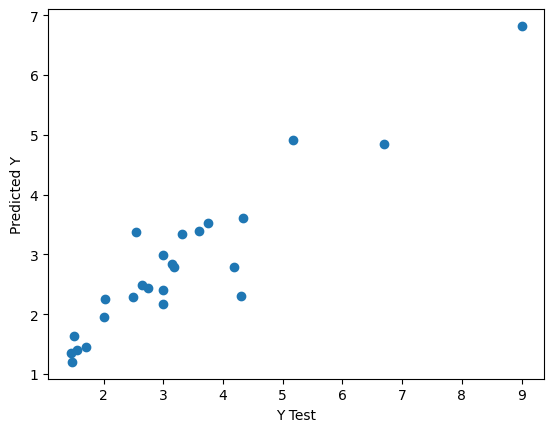

In [ ]:
plt.scatter(y_test, tip_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the model:

You can use metrics such as the mean squared error (MSE) or the coefficient of determination (R-squared) to evaluate the accuracy of the linear regression model.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, tip_predictions)
r2 = r2_score(y_test, tip_predictions)

In [ ]:
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.6884456481075553
R-squared: 0.7602517788014654


Lower the MSE, the more accurate a model is.
An MSE of zero is a perfect model.

R-squared gives a accuracy measure in terms of percentage.

In [ ]:
accuracy = round(r2*100, 2)
print(f'Model accuracy ≈', accuracy, '%')

Model accuracy ≈ 76.03 %


Let's compare the predicted and actual values:

In [ ]:
tip_predictions = [round(prediction, 2) for prediction in tip_predictions]
y_test = list(y_test)

In [ ]:
comparision_df = pd.DataFrame({'Predicted': tip_predictions, 'Actual': y_test})

In [ ]:
comparision_df

Predicted  Actual
0        4.92    5.17
1        3.61    4.34
2        1.20    1.48
3        2.30    4.30
4        3.38    2.55
5        4.84    6.70
6        1.40    1.56
7        2.83    3.15
8        3.53    3.75
9        6.82    9.00
10       1.45    1.71
11       2.48    2.64
12       2.99    3.00
13       2.41    3.00
14       1.35    1.45
15       3.34    3.31
16       1.95    2.00
17       2.26    2.03
18       1.64    1.50
19       2.80    4.19
20       2.30    2.50
21       2.17    3.00
22       3.40    3.60
23       2.80    3.18
24       2.44    2.74

Linear regression is a powerful method for modeling the relationship between input features and target variables, and Seaborn makes it easy to perform and visualize linear regression in Python.

# Logistic Regression

Its similar to linear regression with a bit of difference. Linear Regression is used to handle regression problems whereas Logistic regression is used to handle the classification problems. Linear regression provides a continuous output but Logistic regression provides discreet output.

In [ ]:
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import scipy.special
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

Spider data from Suzuki et al. (2006) In following cells, what we analyze is the same as the analysis made in the paper. However we won't go in that direction because of obvious reasons.

In [ ]:
data = """Grain size (mm)	Spiders
0.245	absent
0.247	absent
0.285	present
0.299	present
0.327	present
0.347	present
0.356	absent
0.36	present
0.363	absent
0.364	present
0.398	absent
0.4	present
0.409	absent
0.421	present
0.432	absent
0.473	present
0.509	present
0.529	present
0.561	absent
0.569	absent
0.594	present
0.638	present
0.656	present
0.816	present
0.853	present
0.938	present
1.036	present
1.045	present
"""
df = pd.read_table(io.StringIO(data))
df.Spiders = df.Spiders == 'present'
df.head()

Grain size (mm)  Spiders
0            0.245    False
1            0.247    False
2            0.285     True
3            0.299     True
4            0.327     True

In [ ]:
df

Grain size (mm)  Spiders
0             0.245    False
1             0.247    False
2             0.285     True
3             0.299     True
4             0.327     True
5             0.347     True
6             0.356    False
7             0.360     True
8             0.363    False
9             0.364     True
10            0.398    False
11            0.400     True
12            0.409    False
13            0.421     True
14            0.432    False
15            0.473     True
16            0.509     True
17            0.529     True
18            0.561    False
19            0.569    False
20            0.594     True
21            0.638     True
22            0.656     True
23            0.816     True
24            0.853     True
25            0.938     True
26            1.036     True
27            1.045     True

In [ ]:
df["Spiders"]

0     False
1     False
2      True
3      True
4      True
5      True
6     False
7      True
8     False
9      True
10    False
11     True
12    False
13     True
14    False
15     True
16     True
17     True
18    False
19    False
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
Name: Spiders, dtype: bool

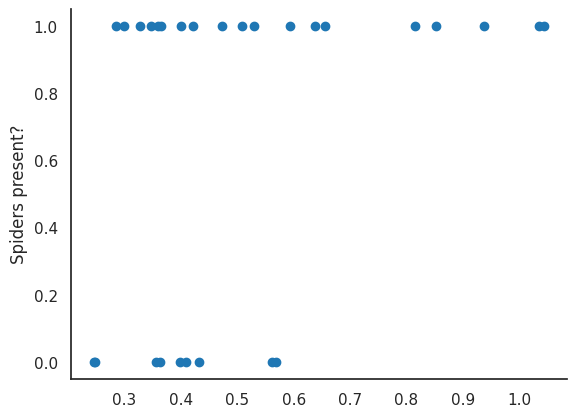

In [ ]:
plt.scatter(df["Grain size (mm)"], df["Spiders"])
plt.ylabel('Spiders present?')
sns.despine()

In [ ]:
import sklearn.linear_model


Scikit-learn has a logisitic regression classifier. This classifier uses regularization. To eliminate regularization, we set the regularization parameter $C$ to $10^{12}$

In [ ]:
# C=1e12 is effectively no regularization - see https://github.com/scikit-learn/scikit-learn/issues/6738
clf = sklearn.linear_model.LogisticRegression(C=1e12, random_state=0)
clf.fit(df['Grain size (mm)'].values.reshape(-1, 1), df['Spiders'])
print(clf.intercept_, clf.coef_)

[-1.64761964] [[5.12153717]]


In [ ]:
def plot_log_reg(x, y, data, clf, xmin=None, xmax=None, alpha=1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    ax.scatter(data[x], data[y], color='black', zorder=20, alpha=alpha)
    if xmin is None:
        xmin = x.min()
    if xmax is None:
        xmax = x.max()
    X_test = np.linspace(xmin, xmax, 300)

    loss = scipy.special.expit(X_test * clf.coef_ + clf.intercept_).ravel()
    ax.plot(X_test, loss, linewidth=3)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    fig.tight_layout()
    sns.despine()
    return fig, ax

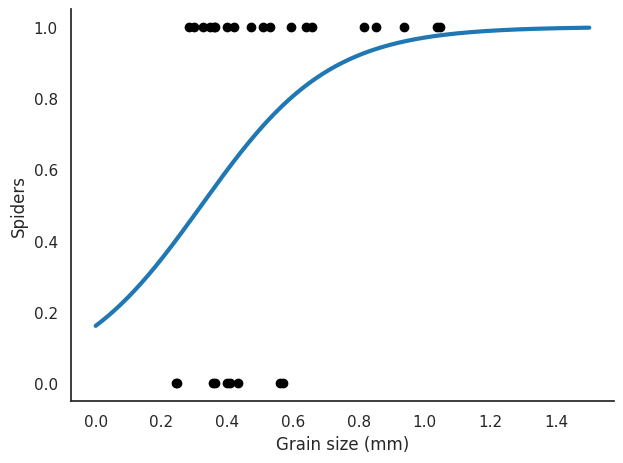

In [ ]:
plot_log_reg(x='Grain size (mm)', y='Spiders', data=df, clf=clf, xmin=0, xmax=1.5);

# Complex Modeling - Advanced Regression and Classification


While linear and logistic regression are good for making simple models for regression and classification respectively, modern tree-based models are known to have the best performance on tabular datasets.


In [ ]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## 1. Decision Trees

### 1.1 What is a decision tree?

Decision trees are a type of supervised learning model that are known to perform very well on labeled tabular datasets. These models work by taking a series of decisions and reaching a conclusion.

Let us look at an example


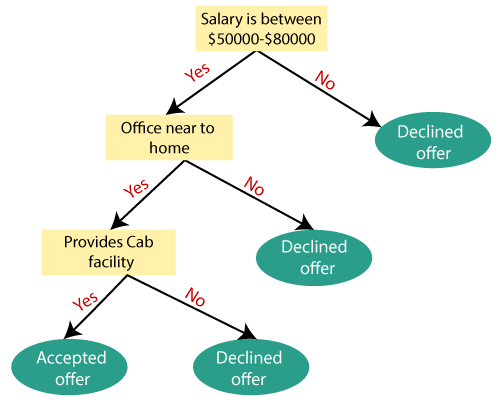

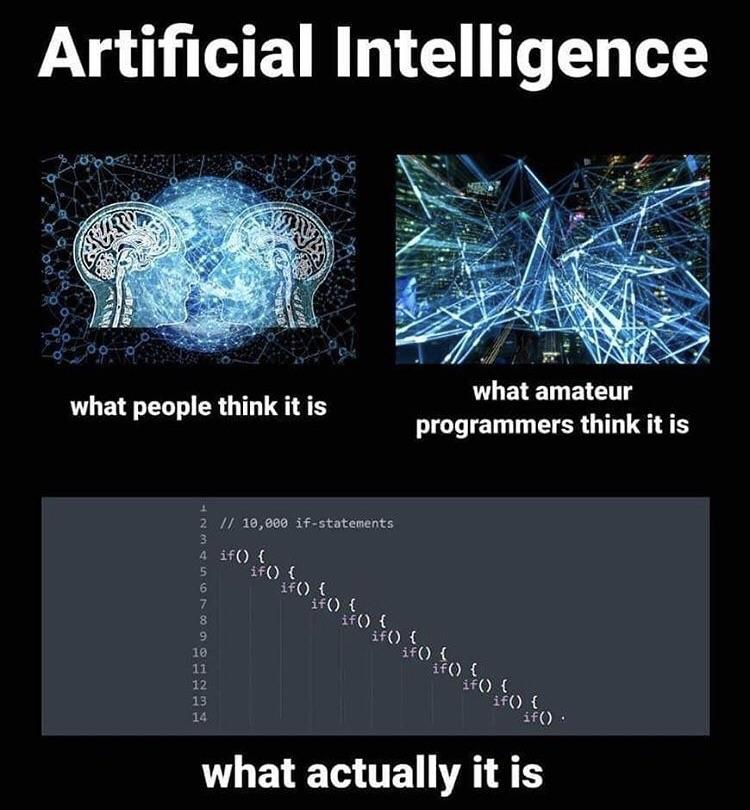


### 1.2 How do we create these trees?

Let us look at an example dataset and see how we can construct the tree above.

| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 55000  | No            | No                  | Corporation  | No            |
| 50000  | Yes           | Yes                 | Startup      | Yes           |
| 45000  | Yes           | Yes                 | Mid-teir     | No            |
| 49000  | No            | Yes                 | Startup      | No            |
| 69000  | No            | No                  | Conglomerate | No            |
| 75000  | Yes           | No                  | Corporation  | Yes           |
| 50000  | No            | Yes                 | Mid-teir     | Yes           |
| 55000  | Yes           | Yes                 | Conglomerate | Yes           |


Now we look at the steps to convert this into a tree. Let the "Do we accept?" column be the target column.

1. Find the column that has the greatest impact on the outcome of the target (under the hood we use a formula such as information-gain which tells us how much one column is affected by another column).
2. Split the dataset based on this column.
3. Repeat steps 1 - 2 till we have reached a good solution or our tree has become big enough.

On the above dataset the process will look like this :

1. Identify Salary as the most influential column and find that the split is around 50,000$.
2. Split the dataset based on this. This gives us the following splits:

Above or equal to 50000$.

| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 55000  | No            | No                  | Corporation  | No            |
| 69000  | No            | No                  | Conglomerate | No            |
| 75000  | Yes           | No                  | Corporation  | Yes           |
| 50000  | No            | Yes                 | Mid-teir     | Yes           |
| 55000  | Yes           | Yes                 | Conglomerate | Yes           |


Below 50,000$.

| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 45000  | Yes           | Yes                 | Mid-teir     | No            |
| 49000  | No            | Yes                 | Startup      | No            |


3. Note that below 50000$ is all no acceptance and label that branch as 'No'.
4. Now split the next tabel based on the next most influential column which is 'Is near home'. Then we get another split.

Is near home = 'Yes'

| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 55000  | Yes           | Yes                 | Conglomerate | Yes           |
| 75000  | Yes           | No                  | Corporation  | Yes           |

Is near home = 'No'

| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 55000  | No            | No                  | Corporation  | No            |
| 69000  | No            | No                  | Conglomerate | No            |
| 50000  | No            | Yes                 | Mid-teir     | Yes           |

5. Note that Is near home = 'Yes' has 100% acceptance and label that branch as 'Yes'.

6. We do the final split on the column 'Offers cab service' and this gives us splits that have all yes or all no in both of them.

Offers cab service = 'Yes'


| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 50000  | No            | Yes                 | Mid-teir     | Yes           |


Offers cab service = 'No'


| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 55000  | No            | No                  | Corporation  | No            |
| 69000  | No            | No                  | Conglomerate | No            |

7. This lets us arrive at a final answer.

Below we have implemented the above processs in python.

To convert the dataset to numbers:
1. Yes / No becomes 1 and 0.
2. The company type is written like this (corporation - 0, startup - 1, mid-teir - 2, conglomerate - 3).

X is a variable with the inputs and Y is a variable with the targets.


To create the modelwe only need to specify a max_depth which is the maximum number of decisions it is allowed to take before it has to give us an answer. Larger max_depth give better accuracy but smaller max_depth models run and train faster. Based on your data try tweaking this to give the best results.

In [ ]:
X = np.array([[55000, 0, 0, 0],
              [50000, 1, 1, 1],
              [45000, 1, 1, 2],
              [49000, 0, 1, 1],
              [69000, 0, 0, 3],
              [75000, 1, 0, 0],
              [50000, 0, 1, 2],
              [55000, 1, 1, 3]])

Y = np.array([0, 1, 0, 0, 0, 1, 1, 1])

clf_tree = DecisionTreeClassifier(max_depth = 3, random_state=6)

clf_tree.fit(X, Y)

print("Loss :", metrics.log_loss(clf_tree.predict(X), Y))

Loss : 2.2204460492503136e-16


In [ ]:
print("Accuracy :", metrics.accuracy_score(clf_tree.predict(X), Y))

Acc : 1.0


### 1.3 Visulization

We can use the in-built plot_tree method to draw a graphical representation of the tree in sklearn.

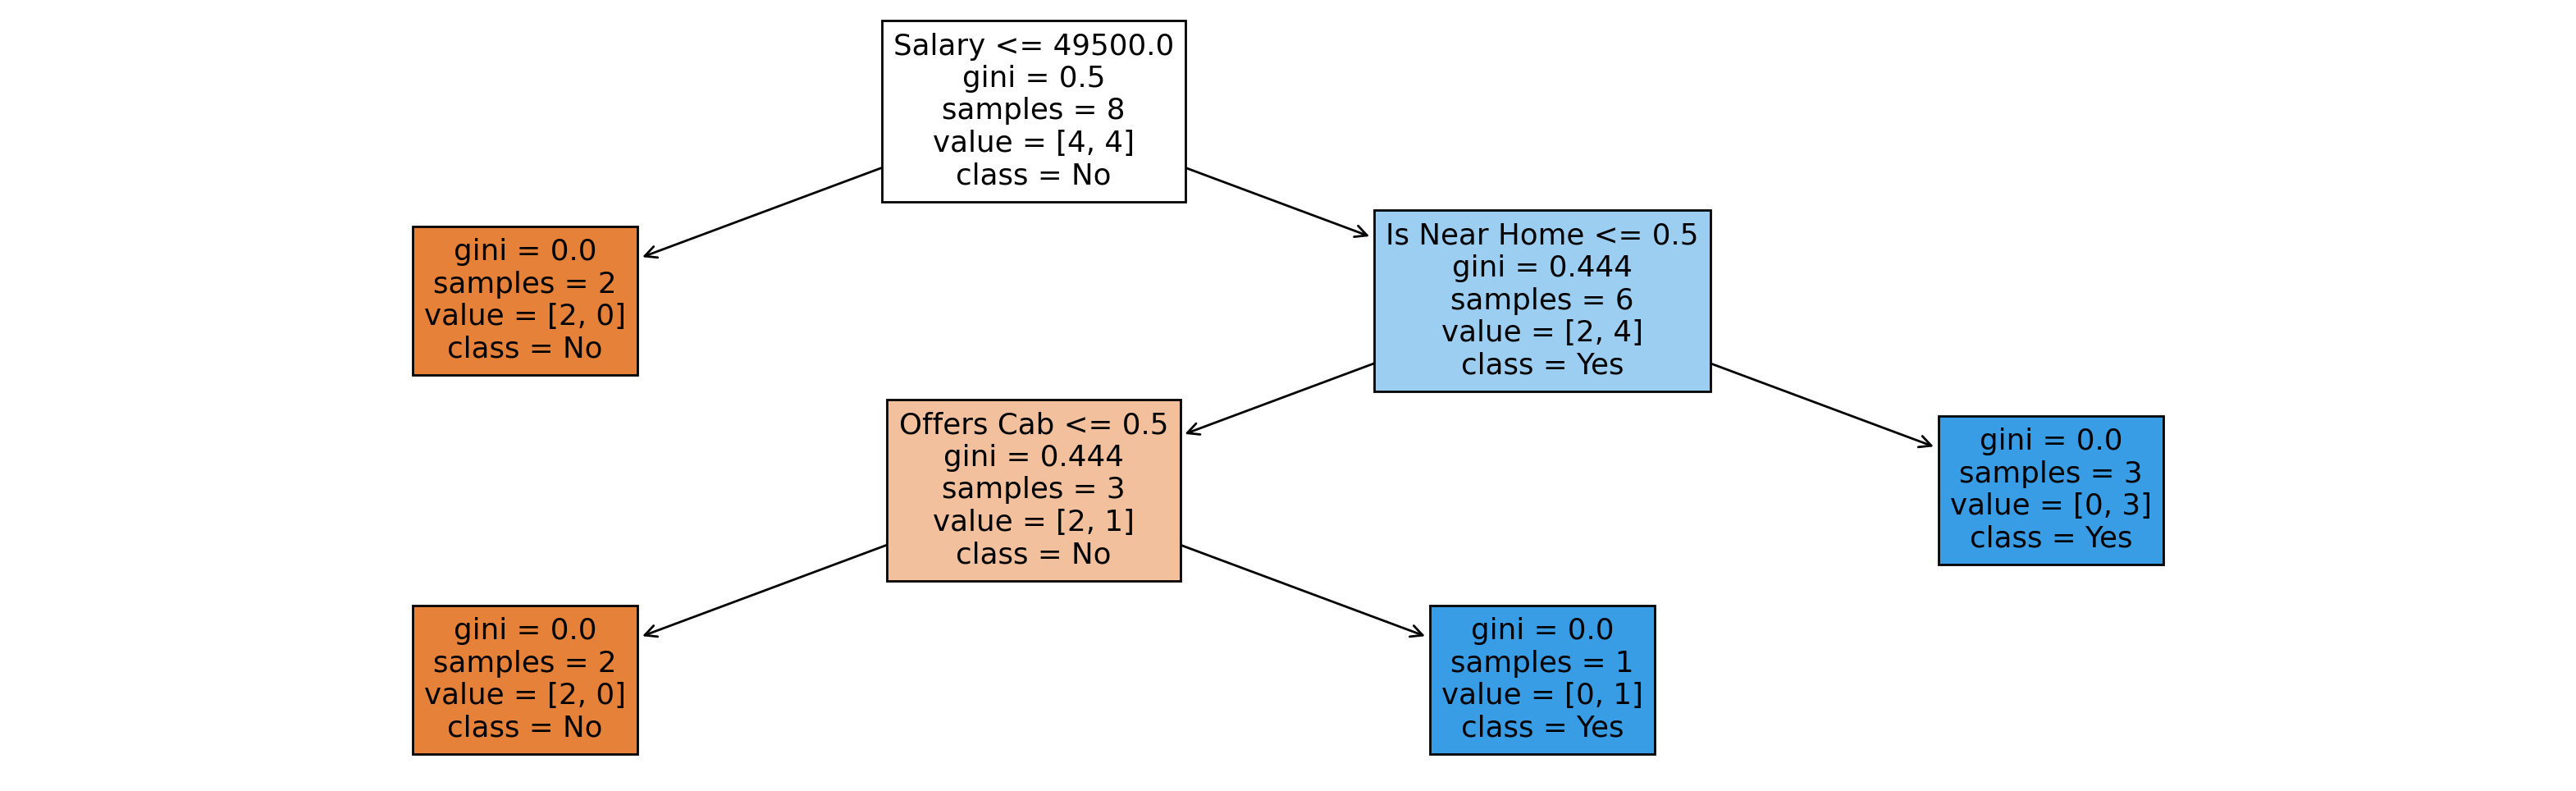

In [ ]:
figure(figsize=(20, 6), dpi=200)

tree.plot_tree(clf_tree, filled = True, feature_names = ["Salary", "Is Near Home", "Offers Cab", "Company Type"], class_names = ["No", "Yes"])


plt.show()

### 1.4 Classification on Real World Datasets


To show a classification example on real world data, we will use a medical dataset and try to predict the prognosis based on the symptoms of the patient.

In [ ]:
data = pd.read_csv("/content/ML-Bootcamp-2024/Session 1/medical_ds/Training.csv")

data.drop('Unnamed: 133', axis = 1, inplace = True)

data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [ ]:
test_df = pd.read_csv("/content/ML-Bootcamp-2024/Session 1/medical_ds/Testing.csv")

test_df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze            prognosis  
0                  0     Fungal infection  
1                  0              Allergy  
2                  0                 GERD  
3                  0  Chronic cholestasis  
4                  0        Drug Reaction  

[5 rows x 133 columns]

In [ ]:
conditions =list(data['prognosis'].unique())

print(conditions)

for i in range(len(conditions)):
    data['prognosis'] = data['prognosis'].replace([conditions[i]], i)
    test_df['prognosis'] = test_df['prognosis'].replace([conditions[i]], i)

data['prognosis'] = data['prognosis'].astype(int)
test_df['prognosis'] = test_df['prognosis'].astype(int)

data.head()

['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo']


itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze  prognosis  
0                  0          0  
1                  0          0  
2                  0          0  
3                  0          0  
4                  0          0  

[5 rows x 133 columns]

In [ ]:
len(conditions)

41

In [ ]:
# Create training and testing data

X_train_clf = data.drop("prognosis", axis = 1).to_numpy()
Y_train_clf = data["prognosis"].to_numpy()


X_test_clf = test_df.drop("prognosis", axis = 1).to_numpy()
Y_test_clf = test_df["prognosis"].to_numpy()

In [ ]:
clf_tree_3 = DecisionTreeClassifier(max_depth = 25, random_state=6)

clf_tree_3.fit(X_train_clf, Y_train_clf)

print("Training accuracy :", metrics.accuracy_score(clf_tree_3.predict(X_train_clf), Y_train_clf))

print("Testing accuracy :", metrics.accuracy_score(clf_tree_3.predict(X_test_clf), Y_test_clf))

Training Loss : 0.6658536585365854
Testing Loss : 0.6904761904761905


In [ ]:
clf_tree_4 = DecisionTreeClassifier(max_depth = 40, random_state=6)

clf_tree_4.fit(X_train_clf, Y_train_clf)

print("Training accuracy :", metrics.accuracy_score(clf_tree_4.predict(X_train_clf), Y_train_clf))

print("Testing accuracy :", metrics.accuracy_score(clf_tree_4.predict(X_test_clf), Y_test_clf))

Training Loss : 0.9768292682926829
Testing Loss : 0.9761904761904762


In [ ]:
clf_tree_5 = DecisionTreeClassifier(max_depth = 100, random_state=6)

clf_tree_5.fit(X_train_clf, Y_train_clf)

print("Training accuracy :", metrics.accuracy_score(clf_tree_5.predict(X_train_clf), Y_train_clf))

print("Testing accuracy :", metrics.accuracy_score(clf_tree_5.predict(X_test_clf), Y_test_clf))

Training Loss : 1.0
Testing Loss : 0.9761904761904762


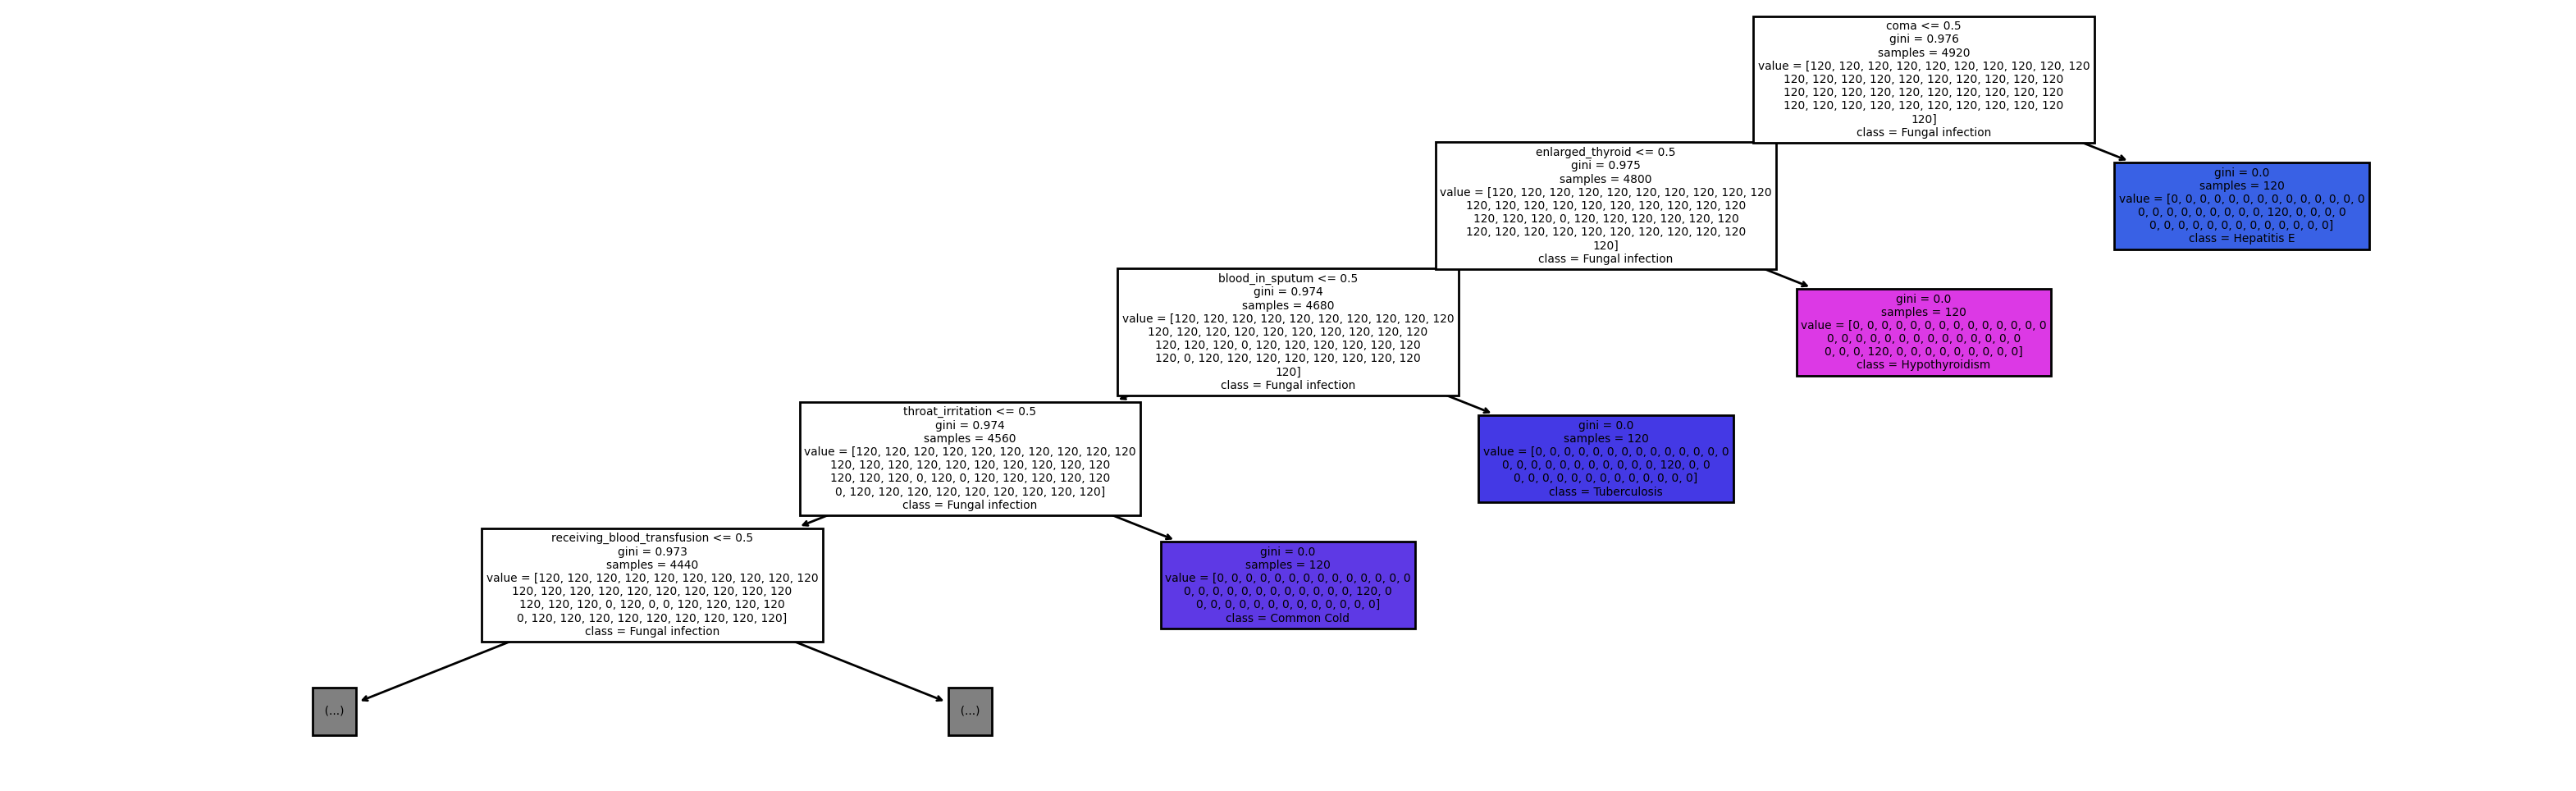

In [ ]:
# Visualisation of the best tree

columns_clf = list(data.columns)

columns_clf.pop(columns_clf.index('prognosis'))

figure(figsize=(20, 6), dpi=200)

tree.plot_tree(clf_tree_4, filled = True, feature_names = columns_clf, class_names = conditions, max_depth = 4)


plt.show()

Sklearn also allows us to see how important certain features are. This returns a percentage where a percentage x at index i means that the feature i had an x% effect on the outcome.





In [ ]:
imp = clf_tree_3.feature_importances_

for i in range(len(columns_clf)):
  print(f"The feature {columns_clf[i]} contributed {imp[i] * 100}% to the final outcome.")


The feature itching contributed 0.0% to the final outcome.
The feature skin_rash contributed 0.0% to the final outcome.
The feature nodal_skin_eruptions contributed 0.0% to the final outcome.
The feature continuous_sneezing contributed 0.0% to the final outcome.
The feature shivering contributed 0.0% to the final outcome.
The feature chills contributed 3.615233723371911% to the final outcome.
The feature joint_pain contributed 0.0% to the final outcome.
The feature stomach_pain contributed 0.0% to the final outcome.
The feature acidity contributed 0.0% to the final outcome.
The feature ulcers_on_tongue contributed 0.0% to the final outcome.
The feature muscle_wasting contributed 0.0% to the final outcome.
The feature vomiting contributed 0.0% to the final outcome.
The feature burning_micturition contributed 0.0% to the final outcome.
The feature spotting_ urination contributed 0.0% to the final outcome.
The feature fatigue contributed 0.0% to the final outcome.
The feature weight_gain 

In [ ]:
imp = clf_tree_4.feature_importances_

for i in range(len(columns_clf)):
  print(f"The feature {columns_clf[i]} contributed {imp[i] * 100}% to the final outcome.")
  if i == 15:
      break

The feature itching contributed 0.24353027343749994% to the final outcome.
The feature skin_rash contributed 0.0% to the final outcome.
The feature nodal_skin_eruptions contributed 2.05302819973085% to the final outcome.
The feature continuous_sneezing contributed 0.0% to the final outcome.
The feature shivering contributed 0.24876868206521757% to the final outcome.
The feature chills contributed 2.433209150975497% to the final outcome.
The feature joint_pain contributed 0.128173828125% to the final outcome.
The feature stomach_pain contributed 2.146559495192308% to the final outcome.
The feature acidity contributed 0.24353027343749994% to the final outcome.
The feature ulcers_on_tongue contributed 0.0% to the final outcome.
The feature muscle_wasting contributed 0.0% to the final outcome.
The feature vomiting contributed 0.0% to the final outcome.
The feature burning_micturition contributed 0.0% to the final outcome.
The feature spotting_ urination contributed 1.8541667772376018% to t

# More Complex Datasets

In [ ]:
data = pd.read_csv("/content/Job_Placement_Data.csv")

data = data.drop("specialisation", axis = 1)
data.head()

gender  ssc_percentage ssc_board  hsc_percentage hsc_board hsc_subject  \
0      M           67.00    Others           91.00    Others    Commerce   
1      M           79.33   Central           78.33    Others     Science   
2      M           65.00   Central           68.00   Central        Arts   
3      M           56.00   Central           52.00   Central     Science   
4      M           85.80   Central           73.60   Central    Commerce   

   degree_percentage undergrad_degree work_experience  emp_test_percentage  \
0              58.00         Sci&Tech              No                 55.0   
1              77.48         Sci&Tech             Yes                 86.5   
2              64.00        Comm&Mgmt              No                 75.0   
3              52.00         Sci&Tech              No                 66.0   
4              73.30        Comm&Mgmt              No                 96.8   

   mba_percent      status  
0        58.80      Placed  
1        66.28      Placed  
2        57.80      Placed  
3        59.43  Not Placed  
4        55.50      Placed

In [ ]:
# Convert the string columns to numerical datatypes

columns_clf = ['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'mba_percent']

data["gender"] = data["gender"].replace(["M"], 0)
data["gender"] = data["gender"].replace(["F"], 1)
data["gender"] = data["gender"].astype(int)

data["ssc_board"] = data["ssc_board"].replace(["Others"], 0)
data["ssc_board"] = data["ssc_board"].replace(["Central"], 1)
data["ssc_board"] = data["ssc_board"].astype(int)

data["hsc_board"] = data["hsc_board"].replace(["Others"], 0)
data["hsc_board"] = data["hsc_board"].replace(["Central"], 1)
data["hsc_board"] = data["hsc_board"].astype(int)

data["hsc_subject"] = data["hsc_subject"].replace(["Commerce"], 0)
data["hsc_subject"] = data["hsc_subject"].replace(["Science"], 1)
data["hsc_subject"] = data["hsc_subject"].replace(["Arts"], 2)
data["hsc_subject"] = data["hsc_subject"].astype(int)

data["undergrad_degree"] = data["undergrad_degree"].replace(["Sci&Tech"], 0)
data["undergrad_degree"] = data["undergrad_degree"].replace(["Comm&Mgmt"], 1)
data["undergrad_degree"] = data["undergrad_degree"].replace(["Others"], 2)
data["undergrad_degree"] = data["undergrad_degree"].astype(int)

data["work_experience"] = data["work_experience"].replace(["No"], 0)
data["work_experience"] = data["work_experience"].replace(["Yes"], 1)
data["work_experience"] = data["work_experience"].astype(int)

data["status"] = data["status"].replace(["Not Placed"], 0)
data["status"] = data["status"].replace(["Placed"], 1)
data["status"] = data["status"].astype(int)

data.head()

gender  ssc_percentage  ssc_board  hsc_percentage  hsc_board  hsc_subject  \
0       0           67.00          0           91.00          0            0   
1       0           79.33          1           78.33          0            1   
2       0           65.00          1           68.00          1            2   
3       0           56.00          1           52.00          1            1   
4       0           85.80          1           73.60          1            0   

   degree_percentage  undergrad_degree  work_experience  emp_test_percentage  \
0              58.00                 0                0                 55.0   
1              77.48                 0                1                 86.5   
2              64.00                 1                0                 75.0   
3              52.00                 0                0                 66.0   
4              73.30                 1                0                 96.8   

   mba_percent  status  
0        58.80       1  
1        66.28       1  
2        57.80       1  
3        59.43       0  
4        55.50       1

In [ ]:
# Create training and testing data


thresh = int(len(data) * 90 / 100) # 90% of the data for training, 10% for testing

X_train_clf = data.drop("status", axis = 1).to_numpy()[:thresh]
Y_train_clf = data["status"].to_numpy()[:thresh]

X_test_clf = data.drop("status", axis = 1).to_numpy()[thresh:]
Y_test_clf = data["status"].to_numpy()[thresh:]

In [ ]:
clf_tree = DecisionTreeClassifier(max_depth = 5, random_state=6)

clf_tree.fit(X_train_clf, Y_train_clf)

print("Training Loss :", metrics.log_loss(clf_tree.predict(X_train_clf), Y_train_clf))

print("Testing Loss :", metrics.log_loss(clf_tree.predict(X_test_clf), Y_test_clf))

Training Loss : 2.4278108500441604
Testing Loss : 1.638347881323507


In [ ]:
clf_tree_3 = DecisionTreeClassifier(max_depth = 7, random_state=6)

clf_tree_3.fit(X_train_clf, Y_train_clf)

print("Training Loss :", metrics.log_loss(clf_tree_3.predict(X_train_clf), Y_train_clf))

print("Testing Loss :", metrics.log_loss(clf_tree_3.predict(X_test_clf), Y_test_clf))

Training Loss : 0.7470187230905111
Testing Loss : 3.276695762647014


In [ ]:
print("Training ACC :", metrics.accuracy_score(clf_tree.predict(X_train_clf), Y_train_clf))

print("Testing ACC :", metrics.accuracy_score(clf_tree.predict(X_test_clf), Y_test_clf))

Training ACC : 0.9326424870466321
Testing ACC : 0.9545454545454546


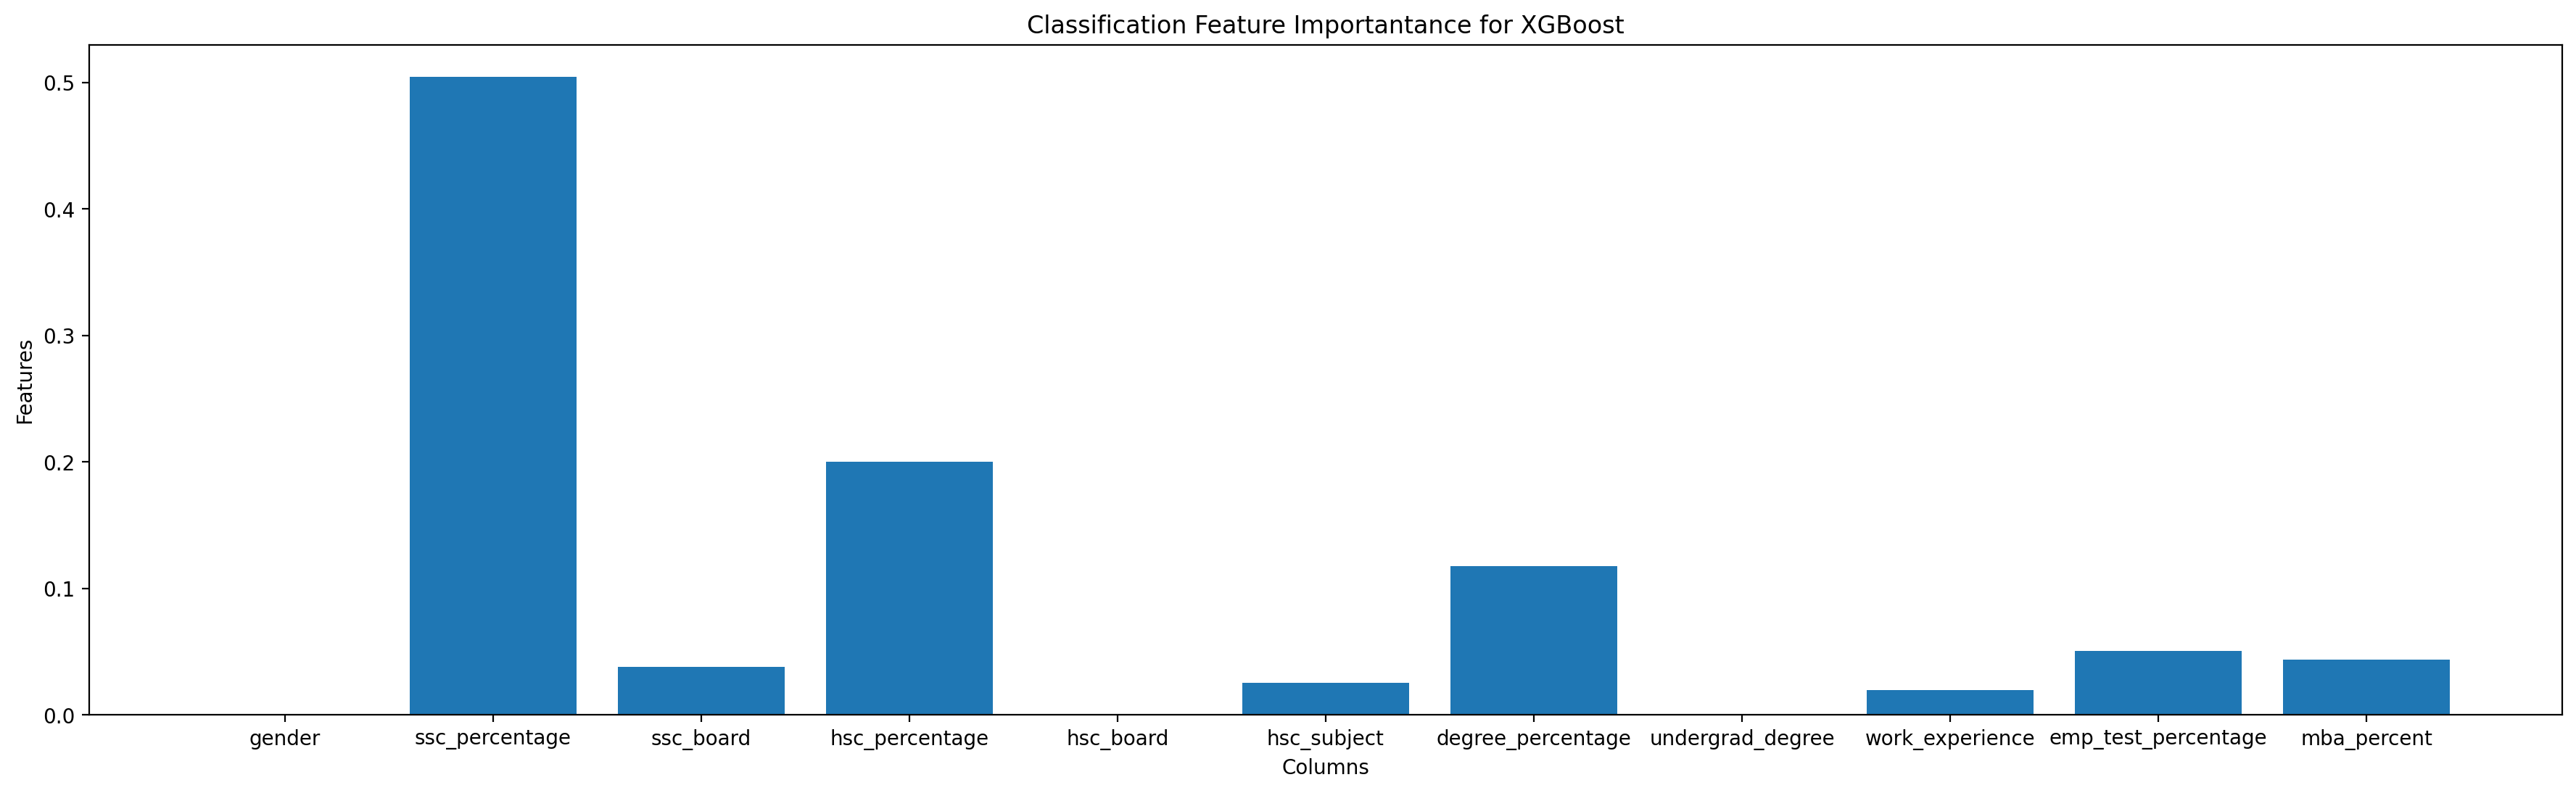

In [ ]:
figure(figsize=(22, 6), dpi=200)

plt.bar(columns_clf, clf_tree.feature_importances_)
plt.title("Classification Feature Importantance for XGBoost")
plt.xlabel("Columns")
plt.ylabel("Features")
plt.show()

## Random Forest Models




In random forest models, we train multiple decision trees on different subsets of the data and then have them vote on the correct answer. If it is a regression problem, we simply average out the results.


In [ ]:
len(data)

215

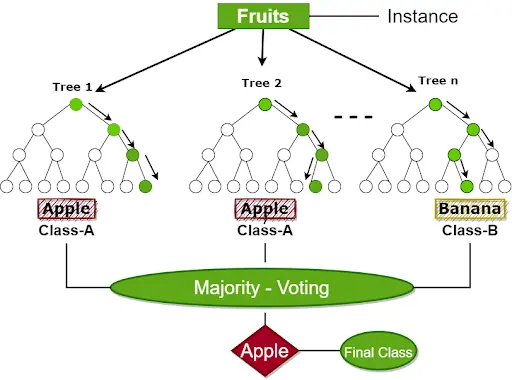

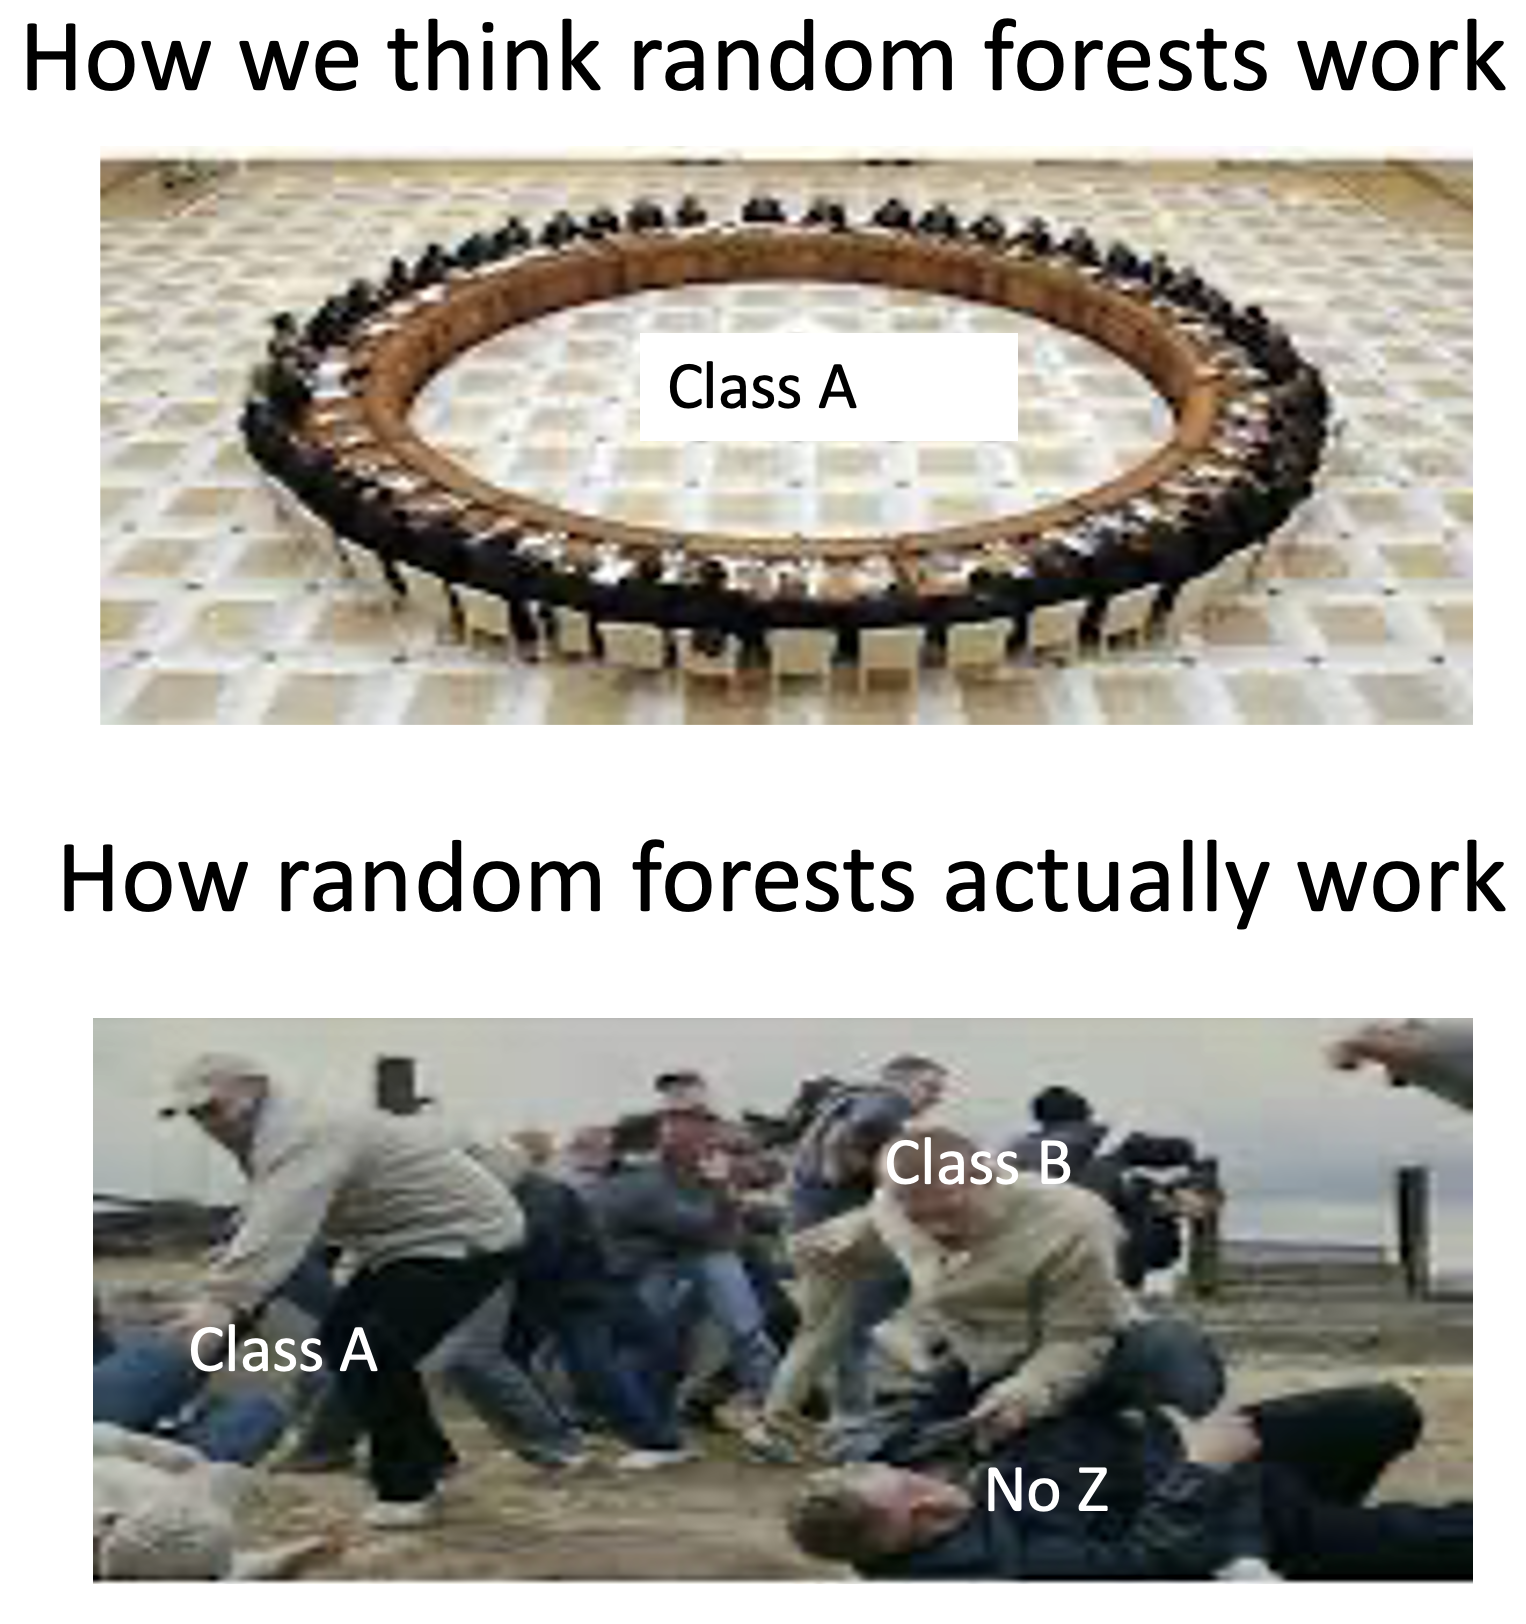

### Random Forest Hyper-parameters

Below are the main hyper-parameters you will need to choose when building a random forest model.

1. n_estimators -> The number of trees that will be used.
2. max_depth -> The maximum depth of each tree.


We also put n_jobs = -1, this just tells the computer that it can use as much of the CPU as it wants to train our model very fast. If we want to use less of our CPU capacity we can set this to the maximum number of cores we want it to use.

In [ ]:
clf_rf = RandomForestClassifier(n_estimators = 300, max_depth=4, n_jobs = -1, random_state=4)

clf_rf.fit(X_train_clf, Y_train_clf)

print("Training Loss :", metrics.log_loss(clf_rf.predict(X_train_clf), Y_train_clf))

print("Testing Loss :", metrics.log_loss(clf_rf.predict(X_test_clf), Y_test_clf))

Training Loss : 2.8013202115894162
Testing Loss : 3.276695762647014


In [ ]:

print("Training ACC :", metrics.accuracy_score(clf_rf.predict(X_train_clf), Y_train_clf))

print("Testing ACC :", metrics.accuracy_score(clf_rf.predict(X_test_clf), Y_test_clf))

Training ACC : 0.9222797927461139
Testing ACC : 0.9090909090909091


In [ ]:
imp = clf_rf.feature_importances_
for i in range(len(columns_clf)):
  print(f"The feature {columns_clf[i]} contributed {imp[i] * 100}% to the final outcome.")

The feature gender contributed 1.1193099400553044% to the final outcome.
The feature ssc_percentage contributed 35.04548179149328% to the final outcome.
The feature ssc_board contributed 0.6148386199017176% to the final outcome.
The feature hsc_percentage contributed 23.6140777205394% to the final outcome.
The feature hsc_board contributed 0.4779820451332016% to the final outcome.
The feature hsc_subject contributed 1.028407193720827% to the final outcome.
The feature degree_percentage contributed 20.208270513644273% to the final outcome.
The feature undergrad_degree contributed 1.4975219308484267% to the final outcome.
The feature work_experience contributed 3.5194714166195413% to the final outcome.
The feature emp_test_percentage contributed 5.249591937745275% to the final outcome.
The feature mba_percent contributed 7.625046890298765% to the final outcome.


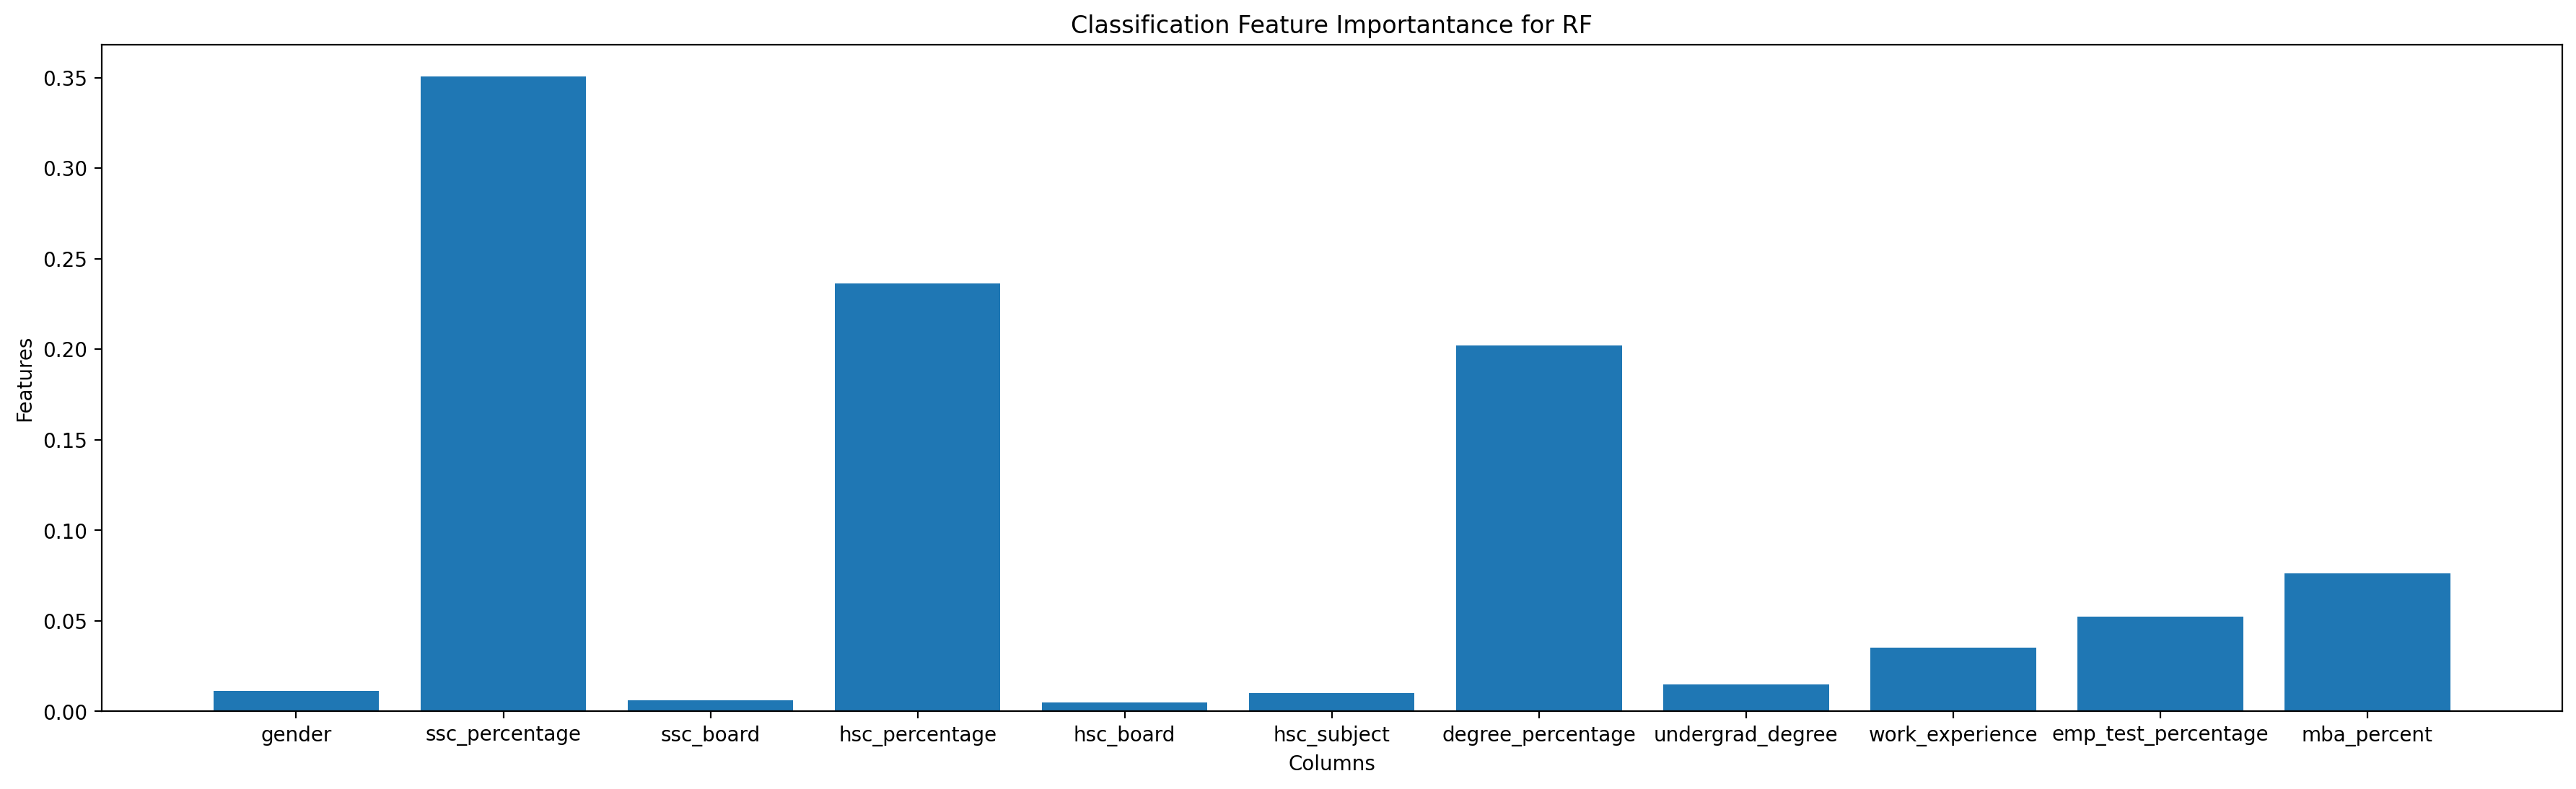

In [ ]:
figure(figsize=(22, 6), dpi=200)

plt.bar(columns_clf, clf_rf.feature_importances_)
plt.title("Classification Feature Importantance for RF")
plt.xlabel("Columns")
plt.ylabel("Features")
plt.show()

## Gradient Boosted Trees


Gradient boosted trees are models that utilise a chain of decision trees to make predictions. It generally follows these steps:

1. Train an initial tree on the data.
2. Gauge the overall error of this tree.
3. Train a new tree that aims to rectify the mistakes of the prior tree instead of learning from scratch.
4. Use the new tree to modify the answers of the previous tree
5. Re-evaluate after the new tree corrects the answers.
6. Repeat steps 3 - 5 for N number of trees.
7. The final results is formed after (N - 1) trees correct each other’s mistakes.

For a fast and powerful implementation of such models we use the XGBoost library in these examples. Other popular trees include LGBM and ADA boost trees.

### 3.1 XGBoost

Xgboost is a more complex and efficient form of the normal gradient boosting algorithm. It is also optimised to run efficiently on both CPU and GPU hardware. Below are the main hyper-parameters you will need to choose when building an xgboost model.

1. n_estimators -> The number of trees that will be chained together.
2. max_depth -> The maximum depth of each tree in the chain.




Note that the xgboost library stores trees in a different format and therefore is not compatible with the plot_tree method of sklearn.

In [ ]:
clf_xgb = XGBClassifier(n_estimators = 20, max_depth=6, n_jobs = -1, seed=3)

clf_xgb.fit(X_train_clf, Y_train_clf)

print("Training Loss :", metrics.log_loss(clf_xgb.predict(X_train_clf), Y_train_clf))

print("Testing Loss :", metrics.log_loss(clf_xgb.predict(X_test_clf), Y_test_clf))

Training Loss : 2.2204460492503136e-16
Testing Loss : 1.638347881323507


In [ ]:
print("Training ACC :", metrics.accuracy_score(clf_xgb.predict(X_train_clf), Y_train_clf))

print("Testing ACC :", metrics.accuracy_score(clf_xgb.predict(X_test_clf), Y_test_clf))

Training ACC : 1.0
Testing ACC : 0.9545454545454546


In [ ]:
imp = clf_xgb.feature_importances_

for i in range(len(columns_clf)):
  print(f"The feature {columns_clf[i]} contributed {imp[i] * 100}% to the final outcome.")

The feature gender contributed 5.102251842617989% to the final outcome.
The feature ssc_percentage contributed 32.35481083393097% to the final outcome.
The feature ssc_board contributed 4.403411224484444% to the final outcome.
The feature hsc_percentage contributed 11.843376606702805% to the final outcome.
The feature hsc_board contributed 2.9443010687828064% to the final outcome.
The feature hsc_subject contributed 4.654479399323463% to the final outcome.
The feature degree_percentage contributed 11.035174876451492% to the final outcome.
The feature undergrad_degree contributed 4.487524181604385% to the final outcome.
The feature work_experience contributed 11.305423825979233% to the final outcome.
The feature emp_test_percentage contributed 4.736224561929703% to the final outcome.
The feature mba_percent contributed 7.133029401302338% to the final outcome.


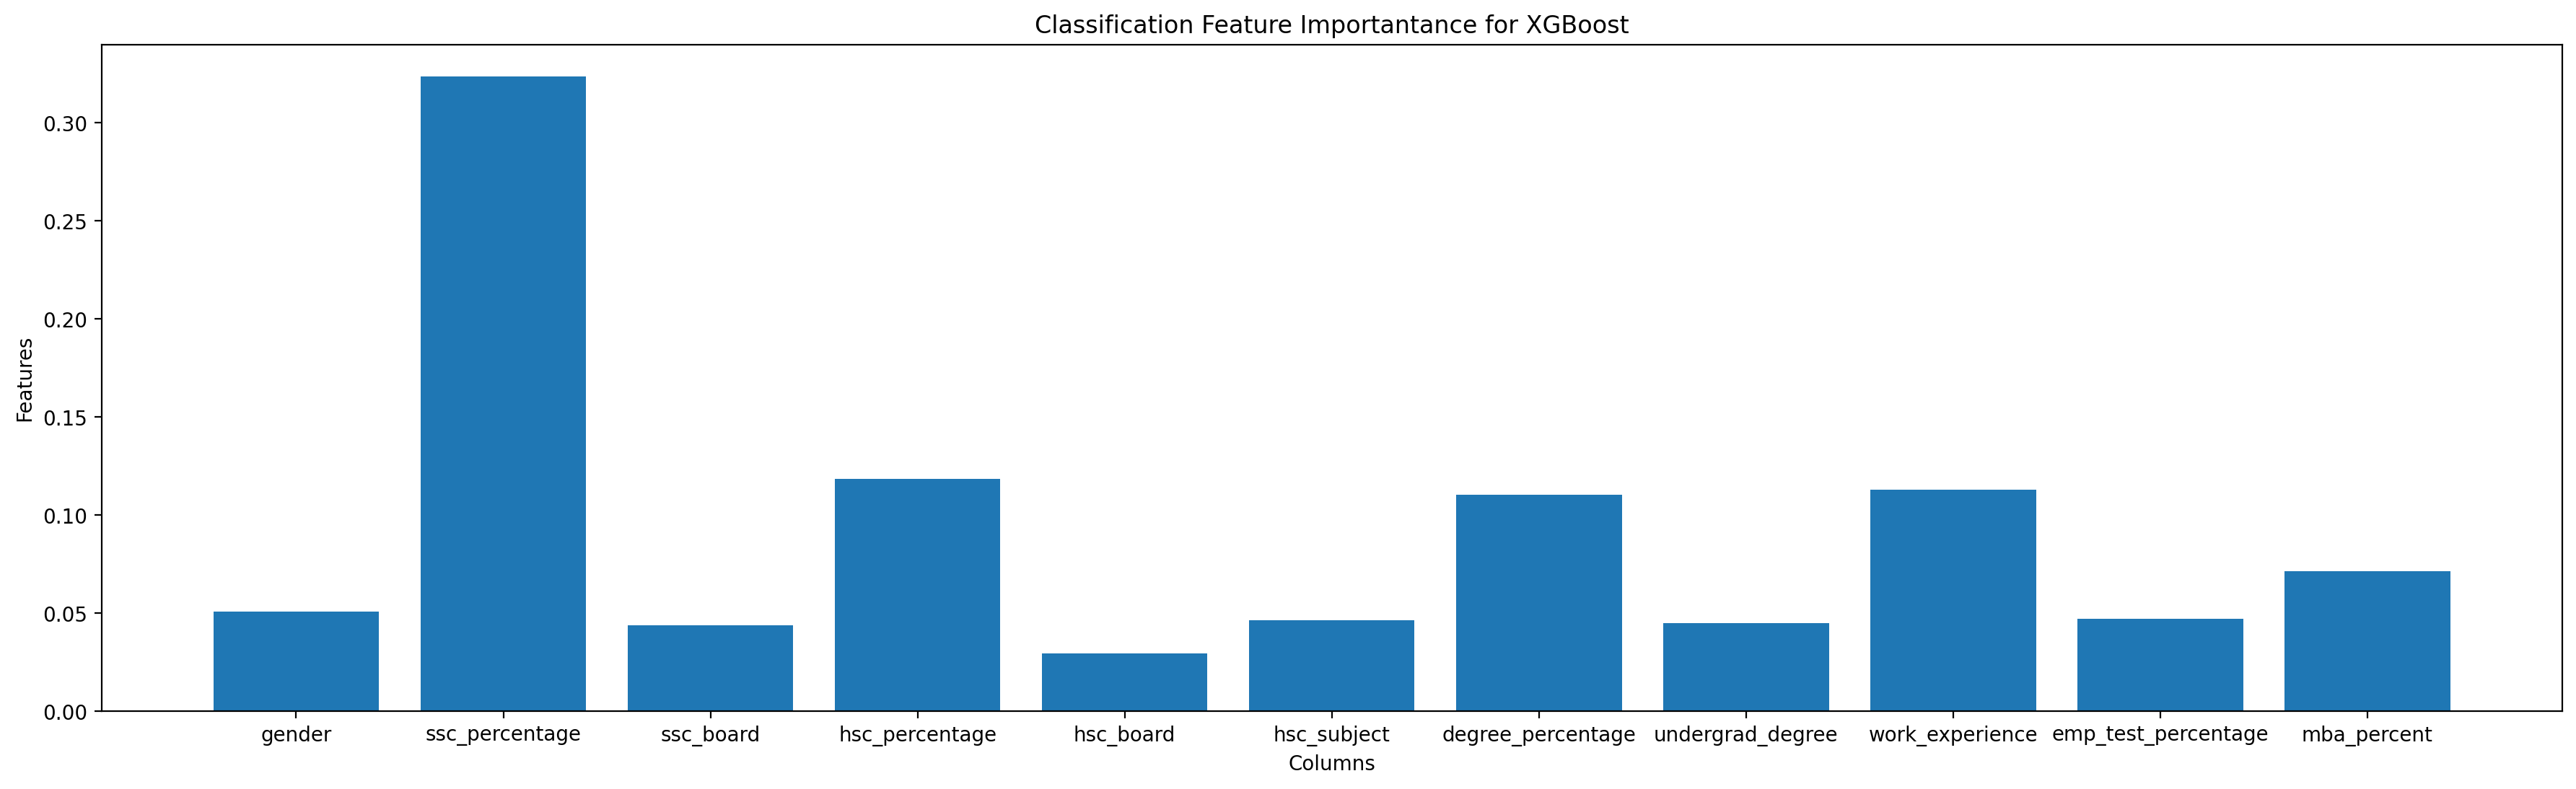

In [ ]:
figure(figsize=(22, 6), dpi=200)

plt.bar(columns_clf, clf_xgb.feature_importances_)
plt.title("Classification Feature Importantance for XGBoost")
plt.xlabel("Columns")
plt.ylabel("Features")
plt.show()

# Comparison of Classifiers

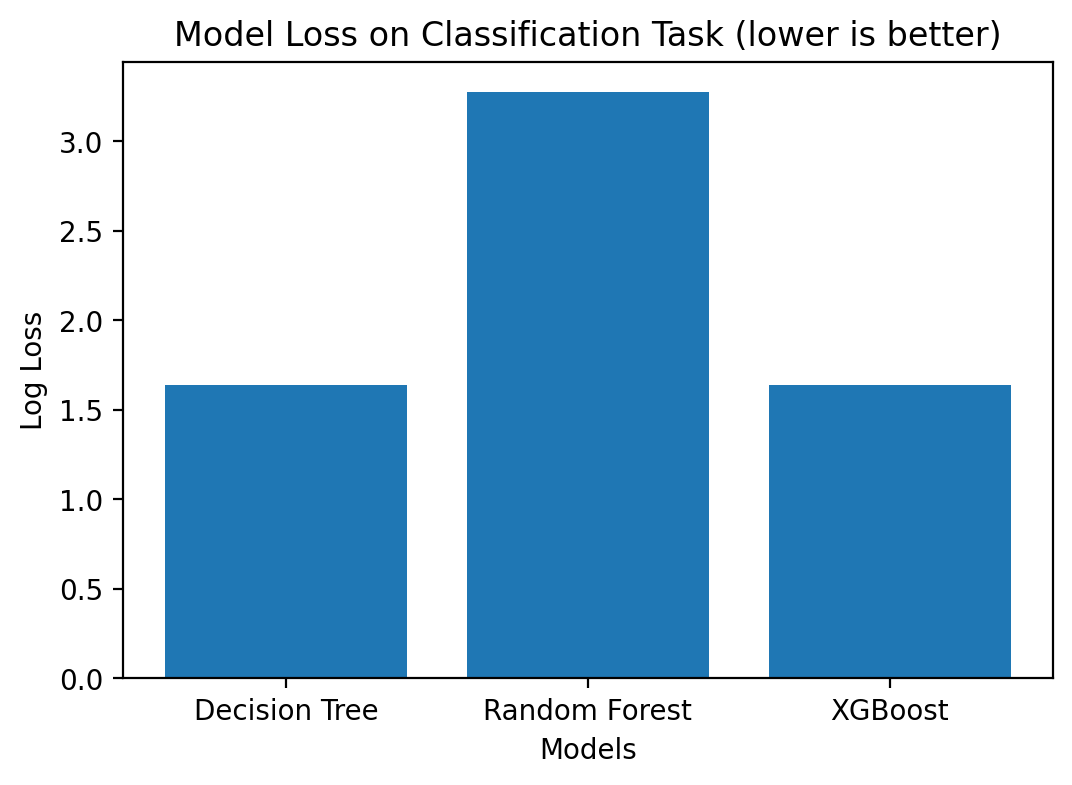

In [ ]:
tree_loss = metrics.log_loss(clf_tree.predict(X_test_clf), Y_test_clf)
rf_loss = metrics.log_loss(clf_rf.predict(X_test_clf), Y_test_clf)
xgb_loss = metrics.log_loss(clf_xgb.predict(X_test_clf), Y_test_clf)


figure(figsize=(6, 4), dpi=200)

plt.bar(["Decision Tree", "Random Forest", "XGBoost"], [tree_loss, rf_loss, xgb_loss])
plt.title("Model Loss on Classification Task (lower is better)")
plt.xlabel("Models")
plt.ylabel("Log Loss")
plt.show()

In [ ]:
tree_loss = metrics.accuracy_score(clf_tree.predict(X_train_clf), Y_train_clf)
rf_loss = metrics.accuracy_score(clf_rf.predict(X_train_clf), Y_train_clf)
xgb_loss = metrics.accuracy_score(clf_xgb.predict(X_train_clf), Y_train_clf)

print(tree_loss, rf_loss, xgb_loss)

0.9326424870466321 0.9222797927461139 1.0


# Regression Using Trees

In [ ]:
train_data = pd.read_csv("/content/sample_data/california_housing_train.csv")

train_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [ ]:
test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")

test_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0

In [ ]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
len(train_data)

17000

In [ ]:
X_train_reg = train_data.drop("median_house_value", axis = 1).to_numpy()
Y_train_reg = train_data["median_house_value"].to_numpy()

X_test_reg = test_data.drop("median_house_value", axis = 1).to_numpy()
Y_test_reg = test_data["median_house_value"].to_numpy()

# Decision Trees For Regression

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth = 10, random_state=6)

reg_tree.fit(X_train_reg, Y_train_reg)

print("Training Loss :", metrics.mean_absolute_error(reg_tree.predict(X_train_reg), Y_train_reg))

print("Testing Loss :", metrics.mean_absolute_error(reg_tree.predict(X_test_reg), Y_test_reg))

Training Loss : 30800.111026813956
Testing Loss : 40980.01788411865


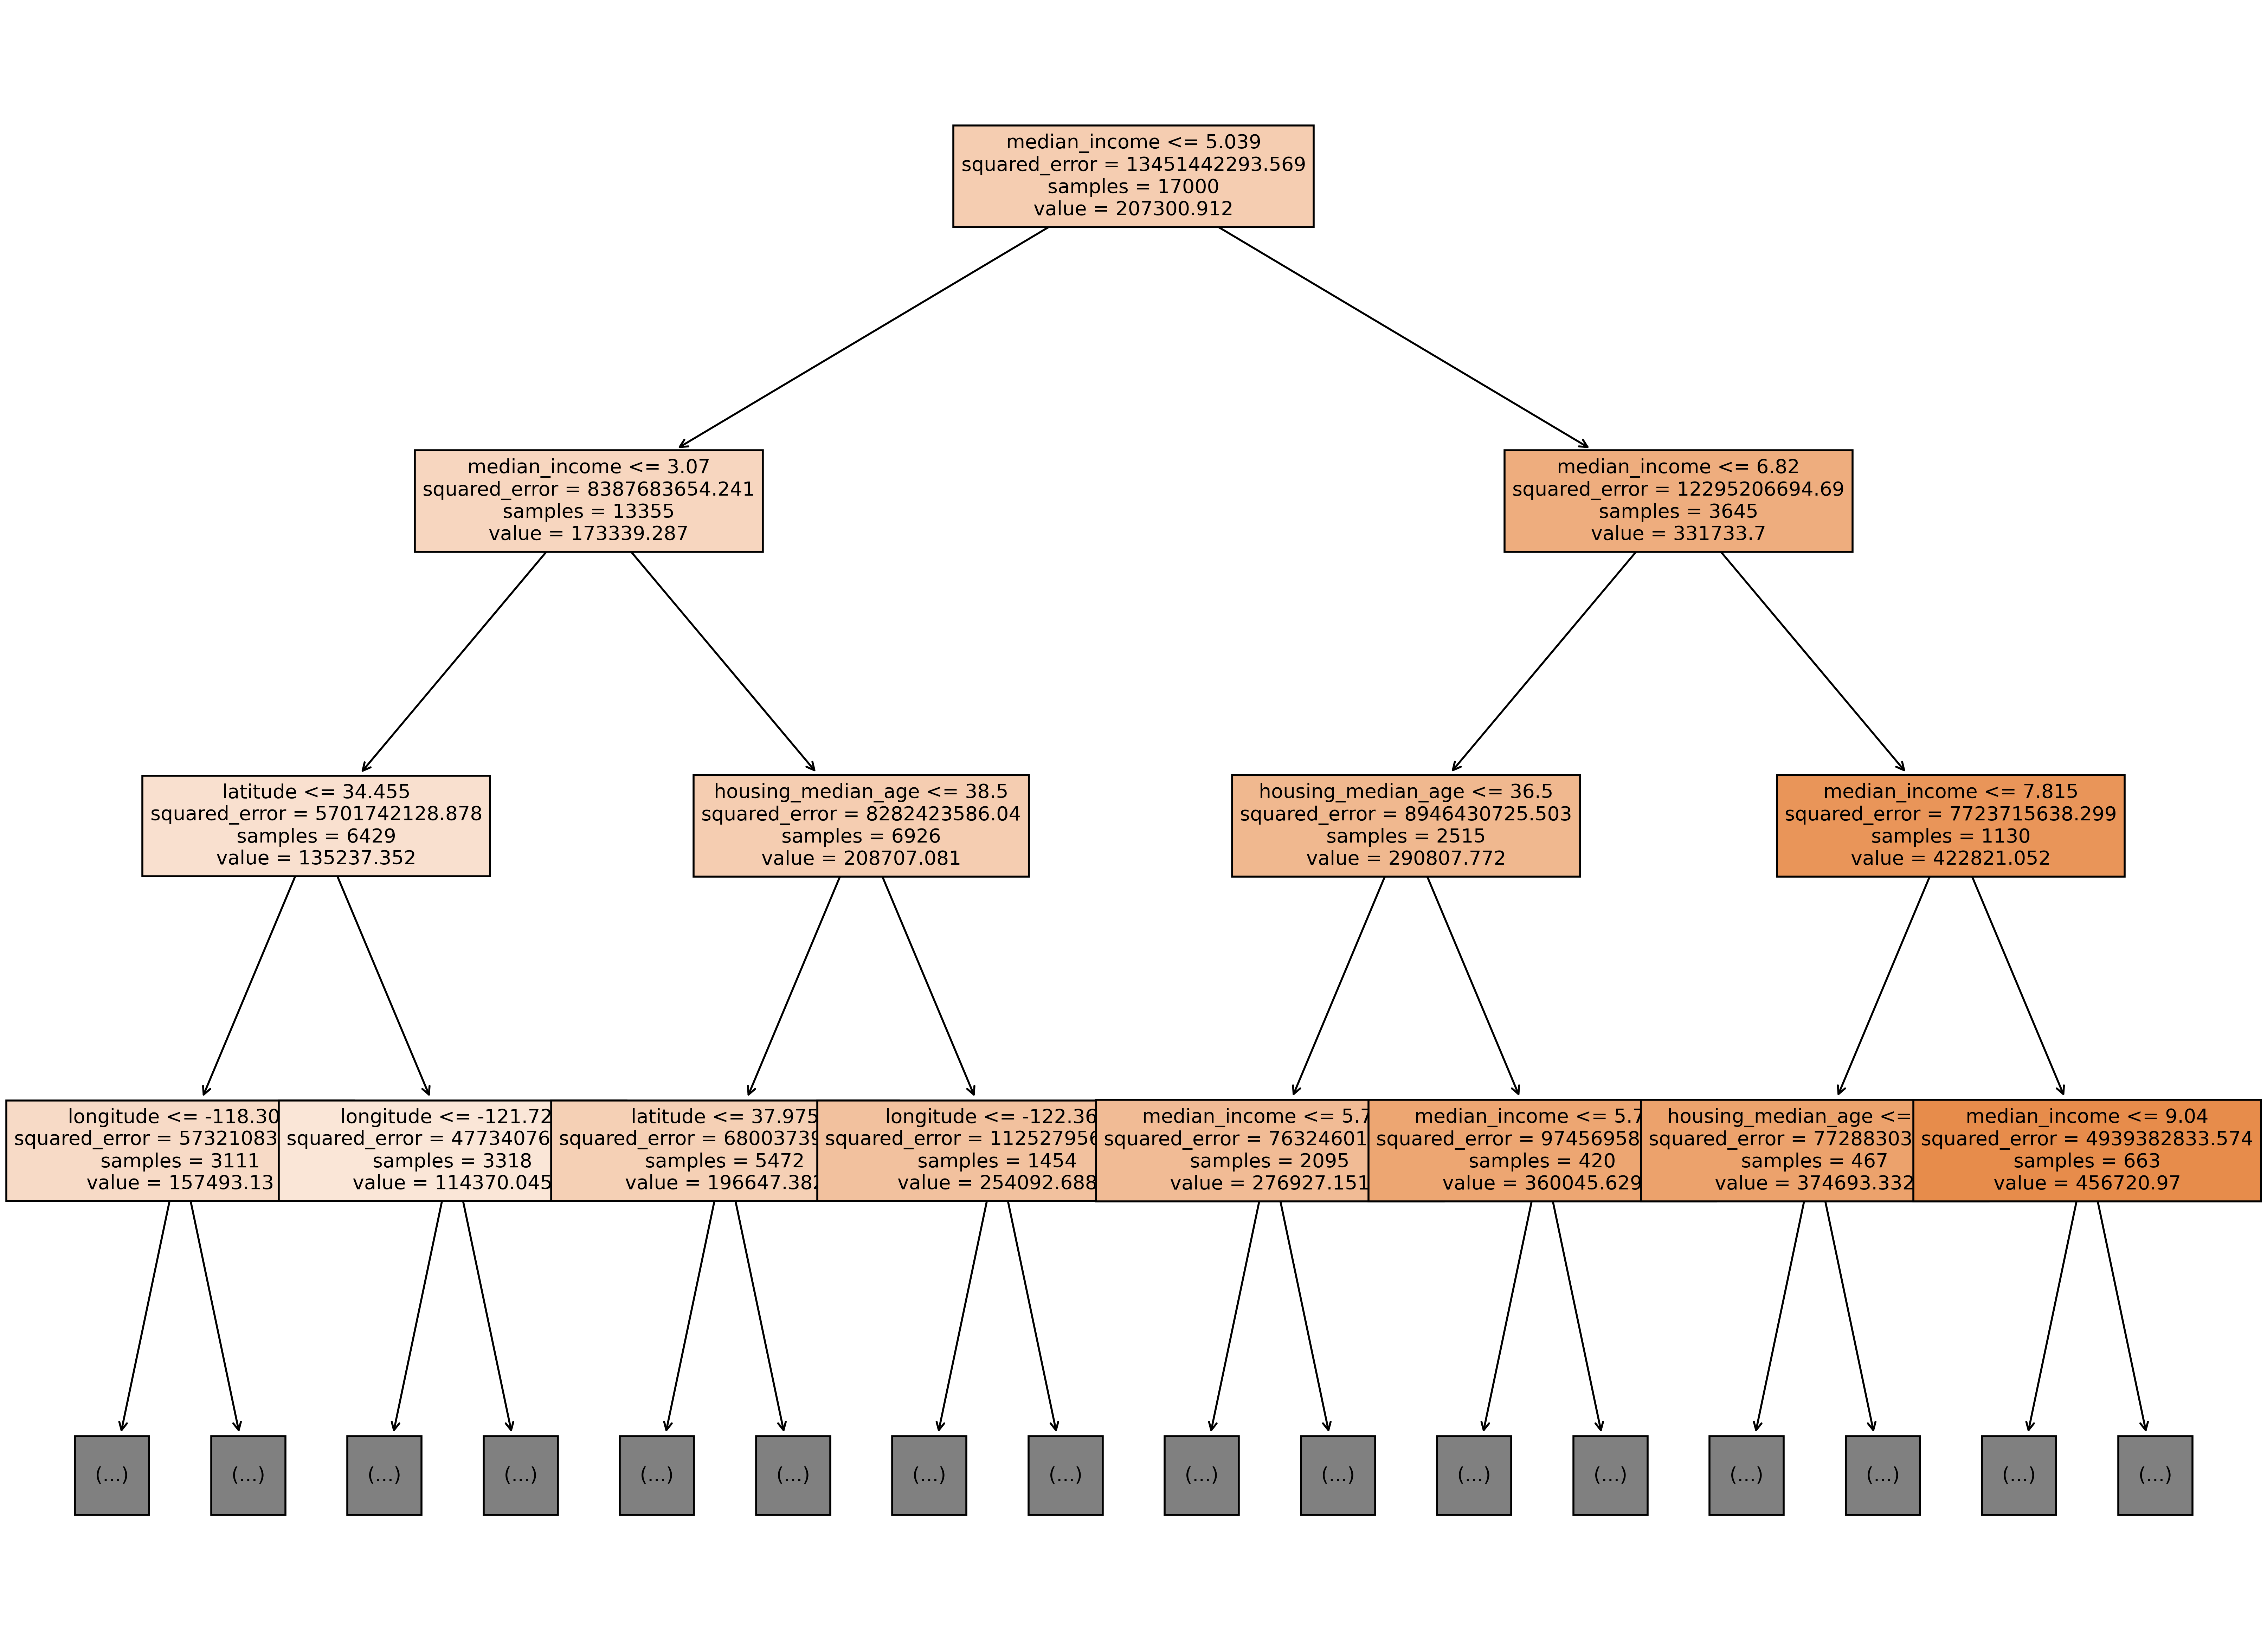

In [ ]:
# Visualisation of the best tree

reg_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

figure(figsize=(20, 15), dpi=400)

tree.plot_tree(reg_tree, filled = True, feature_names = reg_columns,
               max_depth = 3, fontsize=10) # limit the tree to only show the first 3 nodes


plt.show()

The feature longitude contributed 15.563208438870904% to the final outcome.
The feature latitude contributed 16.638618610215868% to the final outcome.
The feature housing_median_age contributed 5.47142054781178% to the final outcome.
The feature total_rooms contributed 0.756339018155957% to the final outcome.
The feature total_bedrooms contributed 1.1302896974804952% to the final outcome.
The feature population contributed 1.3768003197204541% to the final outcome.
The feature households contributed 0.7456319540808211% to the final outcome.
The feature median_income contributed 58.31769141366372% to the final outcome.


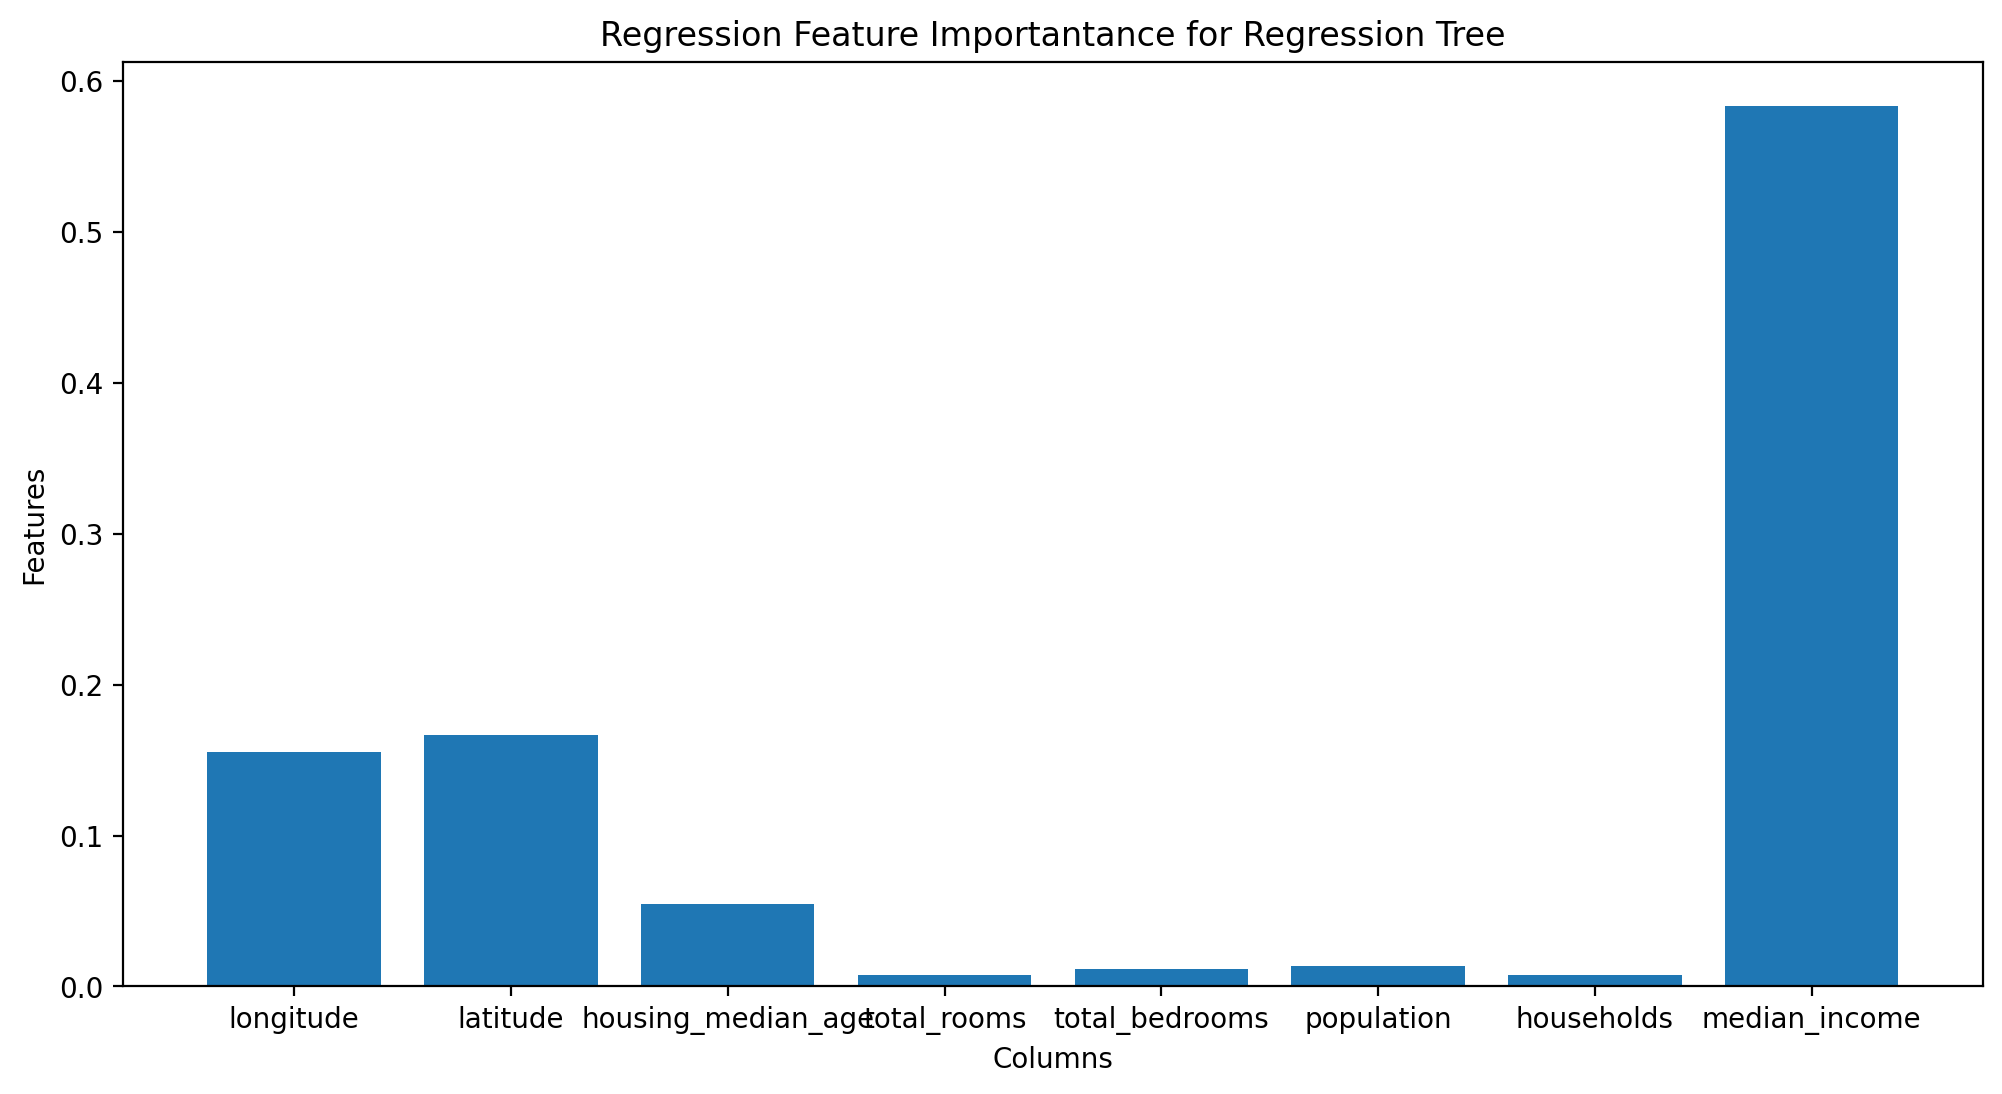

In [ ]:
imp = reg_tree.feature_importances_

for i in range(len(reg_columns)):
  print(f"The feature {reg_columns[i]} contributed {imp[i] * 100}% to the final outcome.")

figure(figsize=(12, 6), dpi=200)

plt.bar(reg_columns, reg_tree.feature_importances_)
plt.title("Regression Feature Importantance for Regression Tree")
plt.xlabel("Columns")
plt.ylabel("Features")
plt.show()

# Random Forest Regression

In [ ]:
reg_rf = RandomForestRegressor(n_estimators = 50, max_depth=15, n_jobs = -1, random_state=3)

reg_rf.fit(X_train_reg, Y_train_reg)

print("Training Loss :", metrics.mean_absolute_error(reg_rf.predict(X_train_reg), Y_train_reg))

print("Testing Loss :", metrics.mean_absolute_error(reg_rf.predict(X_test_reg), Y_test_reg))

Training Loss : 16885.276048778334
Testing Loss : 32885.322945253574


The feature longitude contributed 16.289192107492408% to the final outcome.
The feature latitude contributed 15.194999333209443% to the final outcome.
The feature housing_median_age contributed 5.924326019352224% to the final outcome.
The feature total_rooms contributed 2.1172321958206175% to the final outcome.
The feature total_bedrooms contributed 2.4519246097281338% to the final outcome.
The feature population contributed 3.2494812901481893% to the final outcome.
The feature households contributed 1.8252991866551616% to the final outcome.
The feature median_income contributed 52.94754525759383% to the final outcome.


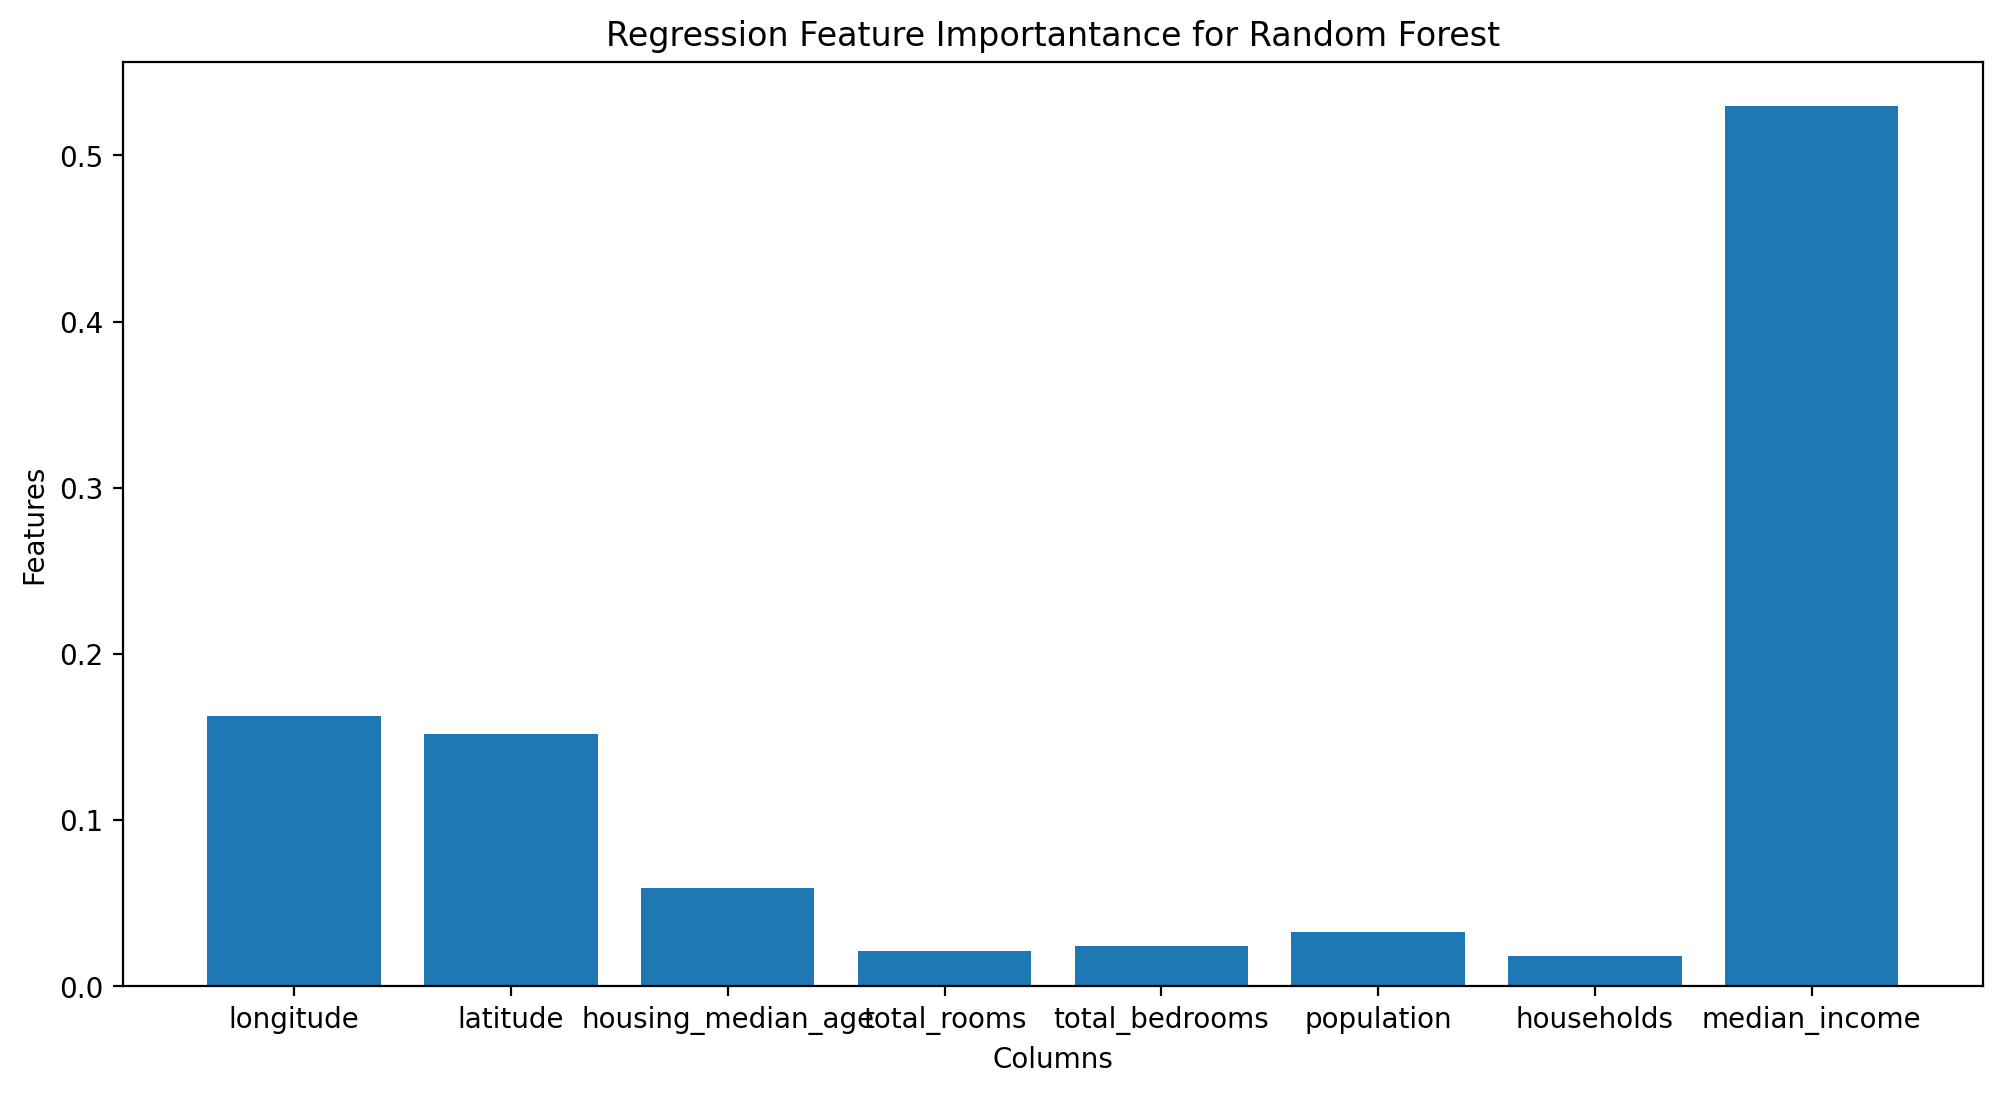

In [ ]:
imp = reg_rf.feature_importances_

for i in range(len(reg_columns)):
  print(f"The feature {reg_columns[i]} contributed {imp[i] * 100}% to the final outcome.")

figure(figsize=(12, 6), dpi=200)

plt.bar(reg_columns, reg_rf.feature_importances_)
plt.title("Regression Feature Importantance for Random Forest")
plt.xlabel("Columns")
plt.ylabel("Features")
plt.show()

# XGBoost Regression

In [ ]:
reg_xgb = XGBRegressor(n_estimators = 10, max_depth=12, n_jobs = -1, seed=3)

reg_xgb.fit(X_train_reg, Y_train_reg)

print("Training Loss :", metrics.mean_absolute_error(reg_xgb.predict(X_train_reg), Y_train_reg))

print("Testing Loss :", metrics.mean_absolute_error(reg_xgb.predict(X_test_reg), Y_test_reg))

Training Loss : 15020.764377757352
Testing Loss : 33602.127217447916


The feature longitude contributed 8.249766379594803% to the final outcome.
The feature latitude contributed 10.84626242518425% to the final outcome.
The feature housing_median_age contributed 6.627519428730011% to the final outcome.
The feature total_rooms contributed 2.2169318050146103% to the final outcome.
The feature total_bedrooms contributed 4.318756982684135% to the final outcome.
The feature population contributed 3.7304263561964035% to the final outcome.
The feature households contributed 3.546779975295067% to the final outcome.
The feature median_income contributed 60.46355366706848% to the final outcome.


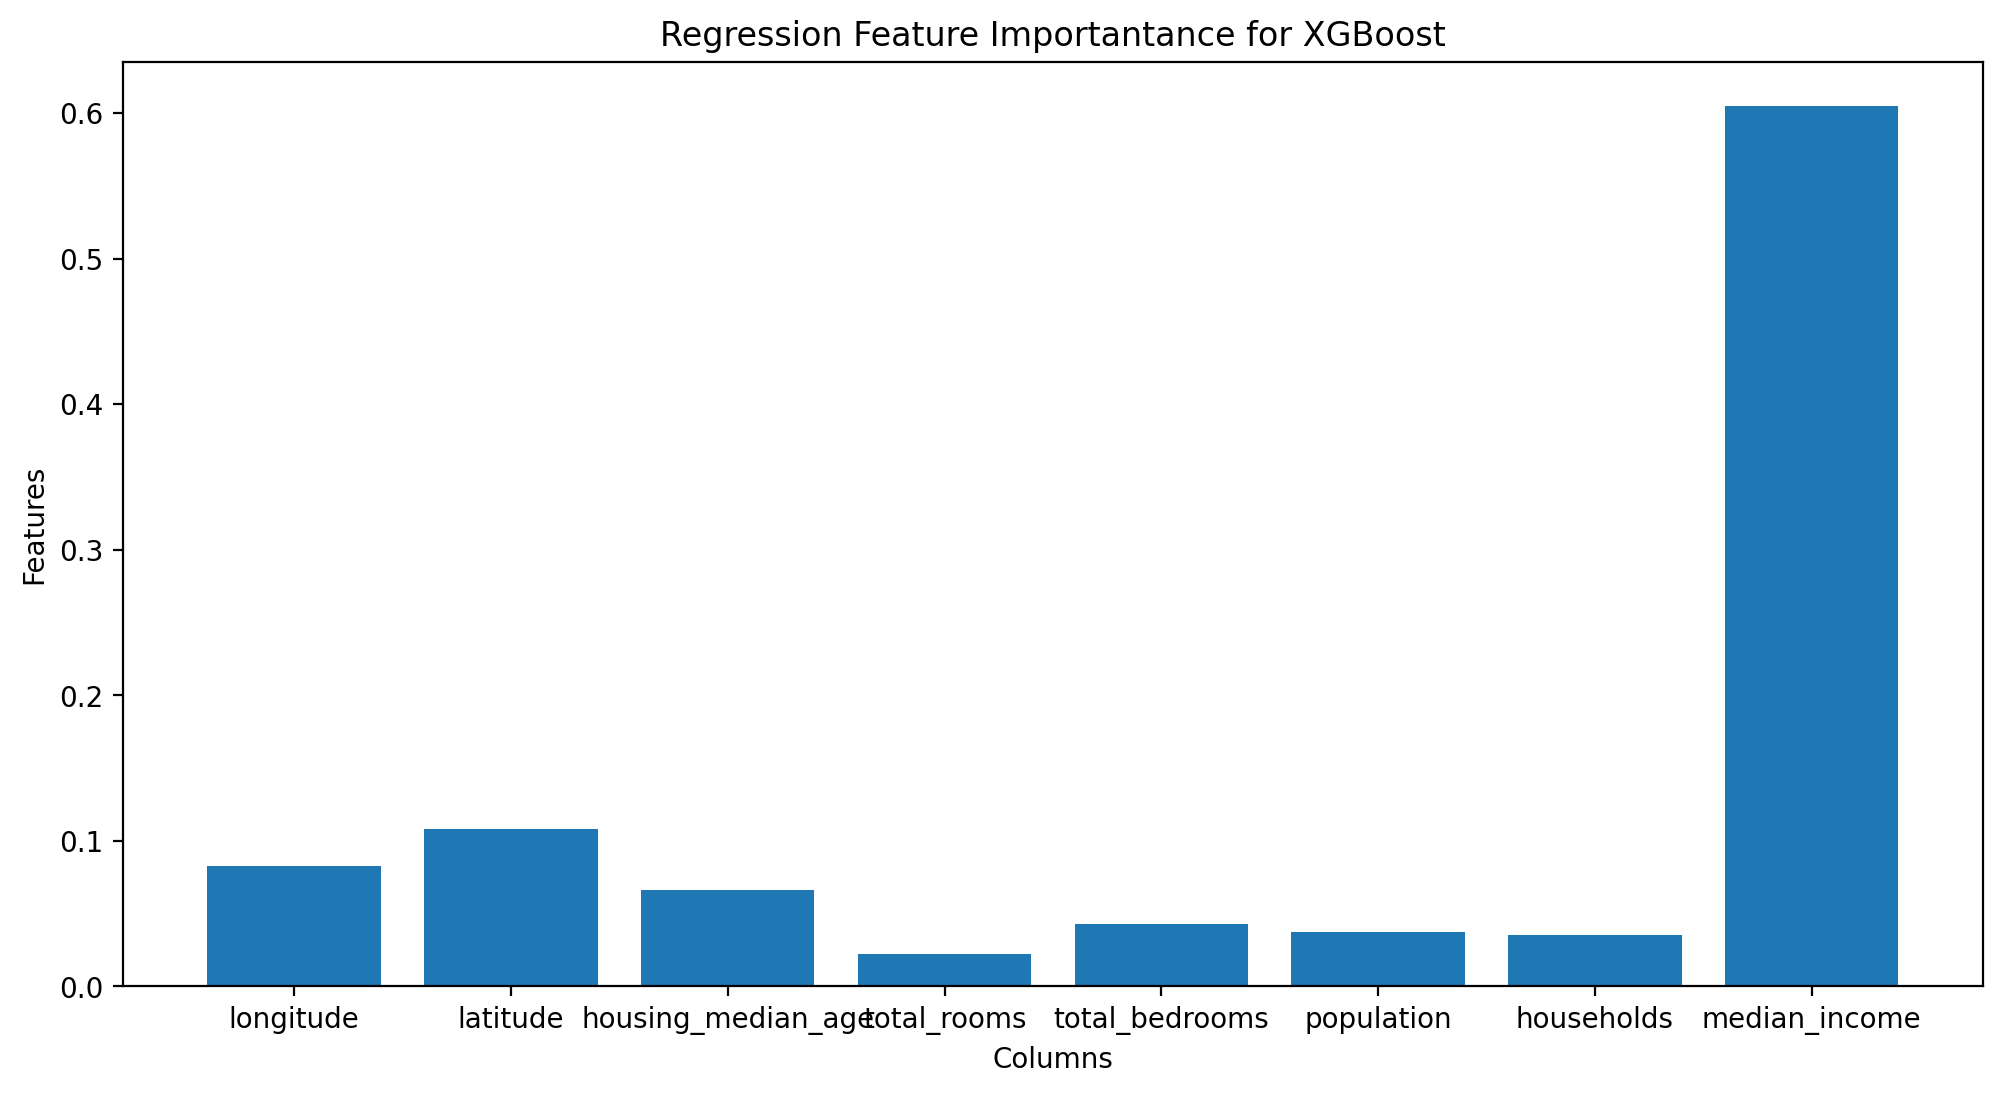

In [ ]:
imp = reg_xgb.feature_importances_

for i in range(len(reg_columns)):
  print(f"The feature {reg_columns[i]} contributed {imp[i] * 100}% to the final outcome.")

figure(figsize=(12, 6), dpi=200)

plt.bar(reg_columns, reg_xgb.feature_importances_)
plt.title("Regression Feature Importantance for XGBoost")
plt.xlabel("Columns")
plt.ylabel("Features")
plt.show()

# Comparison of Regressors


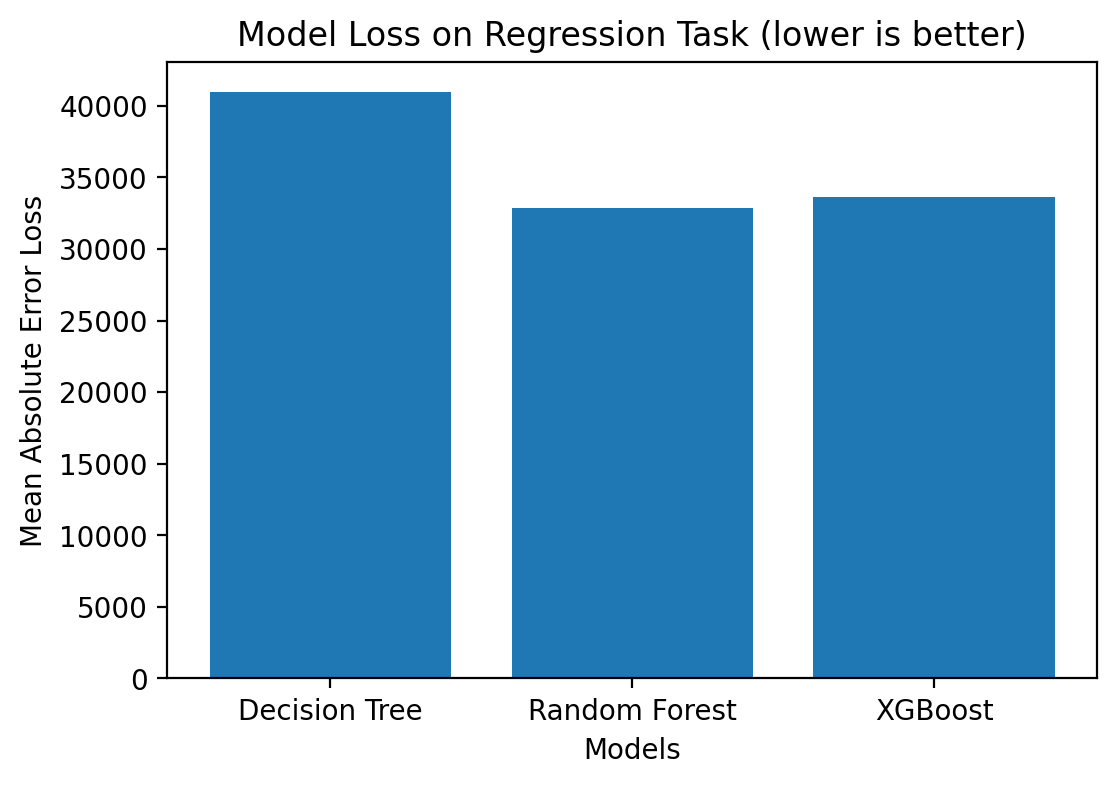

In [ ]:
tree_loss = metrics.mean_absolute_error(reg_tree.predict(X_test_reg), Y_test_reg)
rf_loss = metrics.mean_absolute_error(reg_rf.predict(X_test_reg), Y_test_reg)
xgb_loss = metrics.mean_absolute_error(reg_xgb.predict(X_test_reg), Y_test_reg)


figure(figsize=(6, 4), dpi=200)

plt.bar(["Decision Tree", "Random Forest", "XGBoost"], [tree_loss, rf_loss, xgb_loss])
plt.title("Model Loss on Regression Task (lower is better)")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error Loss")
plt.show()